<a href="https://colab.research.google.com/github/lcondoriz/TA047R-2C2024-GRUPO02/blob/main/TA047R_TP1_GRUPO02_ENTREGA_EJ1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Organización de Datos**

Trabajo Práctico N°1: TLC Trip Record Data

Grupo 02 - 2C2024

Cátedra Ing. Rodriguez, Juan Manuel

Integrantes:

Célestine Raveneau

Florian Escaffe

Juan Angel Gomez

Luis Condori

#Ej1


##Ruta del archivo a procesar

importo librerias a usar y vinculo al drive

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from datetime import time
import pyarrow.parquet as pq
from datetime import date
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
##df = pq.read_table('dataset.parq').to_pandas()

from google.colab import drive
drive.mount('/content/drive')

#taxis_train=pd.read_csv('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/taxi_zone_lookup.csv')

Mounted at /content/drive


##descripcion del tipo de datos almacenados en los datasets de fechas a analizar
* Los registros de viajes en taxi amarillo y verde incluyen campos que registran las fechas y horas de recogida y entrega, los lugares de recogida y entrega, las distancias de los viajes, las tarifas detalladas, los tipos de tarifas, los tipos de pago y los recuentos de pasajeros informados por el conductor. Los datos utilizados en los conjuntos de datos adjuntos fueron recopilados y proporcionados a la Comisión de Taxis y Limusinas de la Ciudad de Nueva York (TLC) por proveedores de tecnología autorizados en virtud de los Programas de Mejora de Pasajeros de Taxis y Limusinas (TPEP/LPEP). Los datos de los viajes no fueron creados por la TLC, y la TLC no hace declaraciones sobre la precisión de estos datos.

* Los registros de viajes de vehículos de alquiler (“FHV”) incluyen campos que capturan el número de licencia de la base de despacho y la fecha, hora y ubicación de la zona de taxis de recogida (archivo de forma a continuación). Estos registros se generan a partir de los envíos de registros de viajes de FHV realizados por las bases.

    Nota: La TLC publica los datos de los registros de viajes de las bases tal como los envían las bases y no podemos garantizar ni confirmar su precisión o integridad. Por lo tanto, es posible que esto no represente la cantidad total de viajes enviados por todas las bases con licencia de la TLC. La TLC realiza revisiones de rutina de los registros y toma medidas de cumplimiento cuando es necesario para garantizar, en la medida de lo posible, información completa y precisa.
    
* Los archivos HVFHV ahora incluirán 17 columnas más (consulte el Diccionario de viajes de FHV de alto volumen para obtener más detalles). También se agregarán columnas adicionales a los archivos antiguos. La fecha más temprana para incluir columnas adicionales: febrero de 2019.

* Los datos de viajes en amarillo incluirán ahora una columna adicional ('airport_fee', consulte el Diccionario de viajes en amarillo para obtener más detalles). La columna adicional también se agregará a los archivos antiguos. La fecha más temprana en la que se incluirá la columna adicional: enero de 2011.

##periodos elegidos/Asignados
Abril, Mayo y Junio

***1) Registro de viajes en taxi amarillo (Yellow Taxi Trip Records)***

  a) VendorID: Un código que indica el proveedor de TPEP que proporcionó el registro.
    1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.

  b) tpep_pickup_datetime: La fecha y hora en que se activó el medidor.

  c) tpep_dropoff_datetime: La fecha y hora en que se desconectó el medidor.

  d) Passenger_count: El número de pasajeros en el vehículo. Este es un valor ingresado por el conductor.

  e) Trip_distance: La distancia recorrida del viaje en millas reportada por el taxímetro.

  f) PULocationID: Zona de Taxi TLC en la que estaba activado el taxímetro.

  g) DOLocationID: Zona de Taxi TLC en la que se desactivó el taxímetro.

  h) RateCodeID: El código de tarifa final vigente al final del viaje (pasar a entero).
    1= Standard rate
    2=JFK
    3=Newark
    4=Nassau or Westchester
    5=Negotiated fare
    6=Group ride

  i) Store_and_fwd_flag: Este indicador indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor, también conocido como "almacenar y reenviar". porque el vehículo no tenía conexión con el servidor.
    Y = viaje de ida y vuelta
    N = no es un viaje de ida y vuelta

  j) Payment_type: Un código numérico que indica cómo el pasajero pagó el viaje.
    1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip

  k) Fare_amount: La tarifa por tiempo y distancia calculada por el taxímetro.

  l) Extra: Extras y recargos varios. Actualmente, esto sólo incluye los cargos de $0,50  y $1,00 por hora pico y por noche.

  m) MTA_tax: Impuesto MTA de $0.50 que se activa automáticamente según la tarifa medida en uso.

  ñ) Improvement_surcharge: Recargo por mejora de $0.30 en viajes evaluados al bajar la bandera. El recargo por mejora comenzó a cobrarse en 2015 (pasar a entero).

  o) Tip_amount: Monto de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.

  p) Tolls_amount: Importe total de todos los peajes pagados en el viaje.
  
  q) Total_amount: El importe total cobrado a los pasajeros. No incluye propinas en efectivo.
  
  r) Congestion_Surcharge: Monto total cobrado en el viaje por el recargo por congestión del Estado de Nueva York.
  
  s) Airport_fee: $1.25 para recogida únicamente en los aeropuertos LaGuardia y John F. Kennedy


  ## * Taxis Amarillos de abril

In [3]:
taxis_amarillos_abril=pd.read_parquet('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/datos/abril/yellow_tripdata_2023-04.parquet')
taxis_amarillos_abril

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-04-01 00:14:49,2023-04-01 00:45:01,2.0,4.90,1.0,N,48,223,1,28.90,3.5,0.5,6.00,0.00,1.0,39.90,2.5,0.00
1,2,2023-04-01 00:00:24,2023-04-01 00:56:19,1.0,21.89,2.0,N,132,43,2,70.00,0.0,0.5,0.00,6.55,1.0,81.80,2.5,1.25
2,1,2023-04-01 00:03:50,2023-04-01 00:14:42,2.0,1.30,1.0,N,148,113,1,11.40,3.5,0.5,2.00,0.00,1.0,18.40,2.5,0.00
3,1,2023-04-01 00:53:18,2023-04-01 01:01:28,1.0,1.50,1.0,N,249,79,1,10.00,3.5,0.5,1.00,0.00,1.0,16.00,2.5,0.00
4,2,2023-04-01 00:07:00,2023-04-01 00:17:16,2.0,1.49,1.0,N,158,246,1,11.40,1.0,0.5,1.00,0.00,1.0,17.40,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288245,2,2023-04-30 23:50:19,2023-05-01 00:06:11,NaN,2.02,NaN,None,246,79,0,11.41,0.0,0.5,3.08,0.00,1.0,18.49,NaN,NaN
3288246,2,2023-04-30 23:28:32,2023-04-30 23:38:32,NaN,2.36,NaN,None,114,68,0,13.19,0.0,0.5,0.00,0.00,1.0,17.19,NaN,NaN
3288247,2,2023-04-30 23:25:26,2023-04-30 23:44:16,NaN,4.64,NaN,None,137,74,0,17.90,0.0,0.5,0.00,0.00,1.0,21.90,NaN,NaN
3288248,1,2023-04-30 23:11:59,2023-04-30 23:26:19,NaN,0.00,NaN,None,162,151,0,16.00,1.0,0.5,4.20,0.00,1.0,27.20,NaN,NaN


## * Amarillos de mayo

In [4]:
taxis_amarillos_mayo=pd.read_parquet('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/datos/mayo/yellow_tripdata_2023-05.parquet')
taxis_amarillos_mayo

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138,43,1,33.80,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138,262,1,35.90,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138,141,1,35.20,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138,140,1,33.10,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138,263,1,31.00,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513644,2,2023-05-31 23:59:36,2023-06-01 00:13:11,NaN,2.18,NaN,None,186,229,0,13.56,0.00,0.5,3.51,0.00,1.0,21.07,NaN,NaN
3513645,2,2023-05-31 23:52:44,2023-05-31 23:56:07,NaN,0.67,NaN,None,224,137,0,11.94,0.00,0.5,2.23,0.00,1.0,18.17,NaN,NaN
3513646,2,2023-05-31 23:26:09,2023-05-31 23:26:23,NaN,0.00,NaN,None,161,161,0,10.63,0.00,0.5,2.93,0.00,1.0,17.56,NaN,NaN
3513647,2,2023-05-31 23:03:44,2023-05-31 23:42:29,NaN,13.95,NaN,None,162,259,0,45.52,0.00,0.5,7.00,0.00,1.0,56.52,NaN,NaN


  ## * Taxis Amarillos de junio

In [5]:
taxis_amarillos_junio=pd.read_parquet('/content/drive/MyDrive/Ta047-tp_2do_cuat_2024_grupo_2/Data/EJ1/datos/junio/yellow_tripdata_2023-06.parquet')
taxis_amarillos_junio

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,21.90,3.50,0.5,6.70,0.00,1.0,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,15.60,3.50,0.5,3.00,0.00,1.0,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,40.80,7.75,0.5,10.00,0.00,1.0,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,39.40,1.00,0.5,8.88,0.00,1.0,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,9.30,1.00,0.5,0.72,0.00,1.0,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,None,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,None,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,None,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,None,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN


##reviso tipos de datos de cada columna

In [6]:
taxis_amarillos_abril.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288250 entries, 0 to 3288249
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

## veo cantidad de nulos en abril
veo cuantos nulos hay por cada columna de la tabla de abril.
si son pocos solo los borro

In [7]:
print("cantidad de no nulos en abril")
print(taxis_amarillos_abril.count()-taxis_amarillos_abril.isna().sum())

cantidad de no nulos en abril
VendorID                 3288250
tpep_pickup_datetime     3288250
tpep_dropoff_datetime    3288250
passenger_count          3106870
trip_distance            3288250
RatecodeID               3106870
store_and_fwd_flag       3106870
PULocationID             3288250
DOLocationID             3288250
payment_type             3288250
fare_amount              3288250
extra                    3288250
mta_tax                  3288250
tip_amount               3288250
tolls_amount             3288250
improvement_surcharge    3288250
total_amount             3288250
congestion_surcharge     3106870
Airport_fee              3106870
dtype: int64


## veo cantidad de nulos en abril
veo cuantos nulos hay por cada columna de la tabla de mayo.
si son pocos solo los borro

In [8]:
print("cantidad de no nulos en mayo")
print(taxis_amarillos_mayo.count()-taxis_amarillos_mayo.isna().sum())

cantidad de no nulos en mayo
VendorID                 3513649
tpep_pickup_datetime     3513649
tpep_dropoff_datetime    3513649
passenger_count          3310057
trip_distance            3513649
RatecodeID               3310057
store_and_fwd_flag       3310057
PULocationID             3513649
DOLocationID             3513649
payment_type             3513649
fare_amount              3513649
extra                    3513649
mta_tax                  3513649
tip_amount               3513649
tolls_amount             3513649
improvement_surcharge    3513649
total_amount             3513649
congestion_surcharge     3310057
Airport_fee              3310057
dtype: int64


## veo cantidad de nulos en junio
veo cuantos nulos hay por cada columna de la tabla de junio.
si son pocos solo los borro

In [9]:
print("cantidad de no nulos en junio")
print(taxis_amarillos_junio.count()-taxis_amarillos_junio.isna().sum())

cantidad de no nulos en junio
VendorID                 3307234
tpep_pickup_datetime     3307234
tpep_dropoff_datetime    3307234
passenger_count          3107460
trip_distance            3307234
RatecodeID               3107460
store_and_fwd_flag       3107460
PULocationID             3307234
DOLocationID             3307234
payment_type             3307234
fare_amount              3307234
extra                    3307234
mta_tax                  3307234
tip_amount               3307234
tolls_amount             3307234
improvement_surcharge    3307234
total_amount             3307234
congestion_surcharge     3107460
Airport_fee              3107460
dtype: int64


## Saco los nans##

In [10]:
taxis_amarillos_abril_limpio=taxis_amarillos_abril.dropna(axis = 0)
#convierto los float a enteros de 8
taxis_amarillos_abril_limpio['passenger_count']=taxis_amarillos_abril_limpio['passenger_count'].astype('int8')
taxis_amarillos_abril_limpio['RatecodeID']=taxis_amarillos_abril_limpio['RatecodeID'].astype('int8')
taxis_amarillos_abril_limpio['improvement_surcharge']=taxis_amarillos_abril_limpio['improvement_surcharge'].astype('int8')
#taxis_amarillos_abril_limpio['store_and_fwd_flag']=taxis_amarillos_abril_limpio['store_and_fwd_flag'].astype(bool)
taxis_amarillos_abril_limpio.loc[taxis_amarillos_abril_limpio.loc[:,"store_and_fwd_flag"]=='N',"store_and_fwd_flag"]=0
taxis_amarillos_abril_limpio.loc[taxis_amarillos_abril_limpio.loc[:,"store_and_fwd_flag"]=='Y',"store_and_fwd_flag"]=1
#taxis_amarillos_abril_limpio

<ipython-input-10-831dcacc32f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['passenger_count']=taxis_amarillos_abril_limpio['passenger_count'].astype('int8')
<ipython-input-10-831dcacc32f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['RatecodeID']=taxis_amarillos_abril_limpio['RatecodeID'].astype('int8')
<ipython-input-10-831dcacc32f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [11]:
taxis_amarillos_mayo_limpio=taxis_amarillos_mayo.dropna(axis = 0)
taxis_amarillos_mayo_limpio['passenger_count']=taxis_amarillos_mayo_limpio['passenger_count'].astype('int8')
taxis_amarillos_mayo_limpio['RatecodeID']=taxis_amarillos_mayo_limpio['RatecodeID'].astype('int8')
taxis_amarillos_mayo_limpio['improvement_surcharge']=taxis_amarillos_mayo_limpio['improvement_surcharge'].astype('int8')
#taxis_amarillos_mayo_limpio['store_and_fwd_flag']=taxis_amarillos_mayo_limpio['store_and_fwd_flag'].astype(bool)
taxis_amarillos_mayo_limpio.loc[taxis_amarillos_mayo_limpio.loc[:,"store_and_fwd_flag"]=='N',"store_and_fwd_flag"]=0
taxis_amarillos_mayo_limpio.loc[taxis_amarillos_mayo_limpio.loc[:,"store_and_fwd_flag"]=='Y',"store_and_fwd_flag"]=1
#taxis_amarillos_mayo_limpio

<ipython-input-11-fe41bebc9633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['passenger_count']=taxis_amarillos_mayo_limpio['passenger_count'].astype('int8')
<ipython-input-11-fe41bebc9633>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['RatecodeID']=taxis_amarillos_mayo_limpio['RatecodeID'].astype('int8')
<ipython-input-11-fe41bebc9633>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [12]:
taxis_amarillos_junio_limpio=taxis_amarillos_junio.dropna(axis = 0)
taxis_amarillos_junio_limpio['passenger_count']=taxis_amarillos_junio_limpio['passenger_count'].astype('int8')
taxis_amarillos_junio_limpio['RatecodeID']=taxis_amarillos_junio_limpio['RatecodeID'].astype('int8')
taxis_amarillos_junio_limpio['improvement_surcharge']=taxis_amarillos_junio_limpio['improvement_surcharge'].astype('int8')
#taxis_amarillos_junio_limpio['store_and_fwd_flag']=taxis_amarillos_junio_limpio['store_and_fwd_flag'].astype(bool)
taxis_amarillos_junio_limpio.loc[taxis_amarillos_junio_limpio.loc[:,"store_and_fwd_flag"]=='N',"store_and_fwd_flag"]=0
taxis_amarillos_junio_limpio.loc[taxis_amarillos_junio_limpio.loc[:,"store_and_fwd_flag"]=='Y',"store_and_fwd_flag"]=1
taxis_amarillos_junio_limpio

<ipython-input-12-8247c03c3418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_junio_limpio['passenger_count']=taxis_amarillos_junio_limpio['passenger_count'].astype('int8')
<ipython-input-12-8247c03c3418>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_junio_limpio['RatecodeID']=taxis_amarillos_junio_limpio['RatecodeID'].astype('int8')
<ipython-input-12-8247c03c3418>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1,3.40,1,0,140,238,1,21.9,3.50,0.5,6.70,0.0,1,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0,3.40,1,0,50,151,1,15.6,3.50,0.5,3.00,0.0,1,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1,10.20,1,0,138,97,1,40.8,7.75,0.5,10.00,0.0,1,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3,9.83,1,0,100,244,1,39.4,1.00,0.5,8.88,0.0,1,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1,1.17,1,0,137,234,1,9.3,1.00,0.5,0.72,0.0,1,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2023-06-30 23:37:53,2023-06-30 23:51:14,2,1.58,1,0,230,162,1,12.8,1.00,0.5,3.56,0.0,1,21.36,2.5,0.00
3207343,2,2023-06-30 23:54:47,2023-07-01 00:07:19,2,1.47,1,0,162,48,2,12.8,1.00,0.5,0.00,0.0,1,17.80,2.5,0.00
3207344,1,2023-06-30 23:47:32,2023-07-01 00:06:45,1,3.30,1,0,249,143,1,17.7,3.50,0.5,1.00,0.0,1,23.70,2.5,0.00
3207345,2,2023-06-30 23:04:54,2023-06-30 23:30:59,1,10.59,1,0,132,39,1,42.9,1.00,0.5,5.00,0.0,1,52.15,0.0,1.75


In [13]:
taxis_amarillos_abril_limpio

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-04-01 00:14:49,2023-04-01 00:45:01,2,4.90,1,0,48,223,1,28.9,3.50,0.5,6.00,0.00,1,39.90,2.5,0.00
1,2,2023-04-01 00:00:24,2023-04-01 00:56:19,1,21.89,2,0,132,43,2,70.0,0.00,0.5,0.00,6.55,1,81.80,2.5,1.25
2,1,2023-04-01 00:03:50,2023-04-01 00:14:42,2,1.30,1,0,148,113,1,11.4,3.50,0.5,2.00,0.00,1,18.40,2.5,0.00
3,1,2023-04-01 00:53:18,2023-04-01 01:01:28,1,1.50,1,0,249,79,1,10.0,3.50,0.5,1.00,0.00,1,16.00,2.5,0.00
4,2,2023-04-01 00:07:00,2023-04-01 00:17:16,2,1.49,1,0,158,246,1,11.4,1.00,0.5,1.00,0.00,1,17.40,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,1,2023-04-30 23:29:24,2023-04-30 23:54:57,3,9.70,1,0,138,151,1,40.8,7.75,0.5,10.00,6.55,1,66.60,0.0,1.75
3197556,2,2023-04-30 23:03:33,2023-04-30 23:09:26,1,1.32,1,0,158,246,1,8.6,1.00,0.5,1.36,0.00,1,14.96,2.5,0.00
3197557,2,2023-04-30 23:24:22,2023-04-30 23:29:17,1,1.23,1,0,48,246,1,7.9,1.00,0.5,2.58,0.00,1,15.48,2.5,0.00
3197558,2,2023-04-30 23:39:17,2023-04-30 23:50:25,1,2.68,1,0,48,79,1,14.2,1.00,0.5,3.84,0.00,1,23.04,2.5,0.00


In [14]:
taxis_amarillos_mayo_limpio

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-05-01 00:33:13,2023-05-01 00:53:01,0,7.80,1,0,138,43,1,33.8,7.75,0.5,8.60,0.00,1,51.65,0.0,1.75
1,1,2023-05-01 00:42:49,2023-05-01 01:11:18,2,8.10,1,0,138,262,1,35.9,10.25,0.5,9.50,0.00,1,57.15,2.5,1.75
2,1,2023-05-01 00:56:34,2023-05-01 01:13:39,2,9.10,1,0,138,141,1,35.2,10.25,0.5,10.70,6.55,1,64.20,2.5,1.75
3,2,2023-05-01 00:00:52,2023-05-01 00:20:12,1,8.21,1,0,138,140,1,33.1,6.00,0.5,2.24,0.00,1,47.09,2.5,1.75
4,1,2023-05-01 00:05:50,2023-05-01 00:19:41,0,7.90,1,0,138,263,1,31.0,10.25,0.5,9.85,6.55,1,59.15,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,2,2023-05-31 23:39:27,2023-05-31 23:56:59,2,3.29,1,0,239,74,1,19.8,1.00,0.5,4.96,0.00,1,29.76,2.5,0.00
3411849,2,2023-05-31 23:15:28,2023-05-31 23:24:48,1,1.81,1,0,79,234,1,12.1,1.00,0.5,2.56,0.00,1,19.66,2.5,0.00
3411850,2,2023-05-31 23:27:31,2023-06-01 00:03:00,1,6.91,1,0,186,223,1,36.6,1.00,0.5,10.40,0.00,1,52.00,2.5,0.00
3411851,1,2023-05-31 23:42:24,2023-05-31 23:53:28,1,2.50,1,0,170,114,1,13.5,3.50,0.5,3.70,0.00,1,22.20,2.5,0.00


In [15]:
taxis_amarillos_junio_limpio

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1,3.40,1,0,140,238,1,21.9,3.50,0.5,6.70,0.0,1,33.60,2.5,0.00
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0,3.40,1,0,50,151,1,15.6,3.50,0.5,3.00,0.0,1,23.60,2.5,0.00
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1,10.20,1,0,138,97,1,40.8,7.75,0.5,10.00,0.0,1,60.05,0.0,1.75
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3,9.83,1,0,100,244,1,39.4,1.00,0.5,8.88,0.0,1,53.28,2.5,0.00
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1,1.17,1,0,137,234,1,9.3,1.00,0.5,0.72,0.0,1,15.02,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2023-06-30 23:37:53,2023-06-30 23:51:14,2,1.58,1,0,230,162,1,12.8,1.00,0.5,3.56,0.0,1,21.36,2.5,0.00
3207343,2,2023-06-30 23:54:47,2023-07-01 00:07:19,2,1.47,1,0,162,48,2,12.8,1.00,0.5,0.00,0.0,1,17.80,2.5,0.00
3207344,1,2023-06-30 23:47:32,2023-07-01 00:06:45,1,3.30,1,0,249,143,1,17.7,3.50,0.5,1.00,0.0,1,23.70,2.5,0.00
3207345,2,2023-06-30 23:04:54,2023-06-30 23:30:59,1,10.59,1,0,132,39,1,42.9,1.00,0.5,5.00,0.0,1,52.15,0.0,1.75


##veo cuantos quedaron en la tabla##

In [16]:
print(taxis_amarillos_abril_limpio.count())

VendorID                 3197560
tpep_pickup_datetime     3197560
tpep_dropoff_datetime    3197560
passenger_count          3197560
trip_distance            3197560
RatecodeID               3197560
store_and_fwd_flag       3197560
PULocationID             3197560
DOLocationID             3197560
payment_type             3197560
fare_amount              3197560
extra                    3197560
mta_tax                  3197560
tip_amount               3197560
tolls_amount             3197560
improvement_surcharge    3197560
total_amount             3197560
congestion_surcharge     3197560
Airport_fee              3197560
dtype: int64


In [17]:
print(taxis_amarillos_mayo_limpio.count())

VendorID                 3411853
tpep_pickup_datetime     3411853
tpep_dropoff_datetime    3411853
passenger_count          3411853
trip_distance            3411853
RatecodeID               3411853
store_and_fwd_flag       3411853
PULocationID             3411853
DOLocationID             3411853
payment_type             3411853
fare_amount              3411853
extra                    3411853
mta_tax                  3411853
tip_amount               3411853
tolls_amount             3411853
improvement_surcharge    3411853
total_amount             3411853
congestion_surcharge     3411853
Airport_fee              3411853
dtype: int64


In [18]:
print(taxis_amarillos_junio_limpio.count())

VendorID                 3207347
tpep_pickup_datetime     3207347
tpep_dropoff_datetime    3207347
passenger_count          3207347
trip_distance            3207347
RatecodeID               3207347
store_and_fwd_flag       3207347
PULocationID             3207347
DOLocationID             3207347
payment_type             3207347
fare_amount              3207347
extra                    3207347
mta_tax                  3207347
tip_amount               3207347
tolls_amount             3207347
improvement_surcharge    3207347
total_amount             3207347
congestion_surcharge     3207347
Airport_fee              3207347
dtype: int64


#**Analisis Exploratorio**#

 **a) Cuantitativas**


  
  VendorID
  passenger_count
  trip_distance
  RatecodeID
  PULocationID
  DOLocationID
  payment_type
  fare_amount
  extra	mta_tax
  tip_amount
  tolls_amount
  improvement_surcharge
  total_amount
  congestion_surcharge
  Airport_fee

  sobre el dataset LIMPIO

In [19]:
print("estadisticas de la tabla de abril")
taxis_amarillos_abril_limpio_para_est=taxis_amarillos_abril_limpio.loc[:, ["VendorID", "passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount",	"improvement_surcharge","total_amount","congestion_surcharge","Airport_fee"]]
#taxis_amarillos_abril_limpio_para_est_cuali=taxis_amarillos_abril_limpio.loc[:, ["tpep_pickup_datetime", "tpep_dropoff_datetime","store_and_fwd_flag"]]
taxis_amarillos_abril_limpio_para_est.describe()

estadisticas de la tabla de abril


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06,3.197560e+06
mean,1.729881e+00,1.382820e+00,3.559276e+00,1.598646e+00,1.653541e+02,1.642602e+02,1.227809e+00,1.928252e+01,1.608886e+00,4.864885e-01,3.512825e+00,5.841512e-01,9.804110e-01,2.821494e+01,2.270376e+00,1.409284e-01
std,4.440214e-01,9.064290e-01,2.321620e+01,7.148677e+00,6.390828e+01,7.006590e+01,5.118352e-01,1.893947e+01,1.848135e+00,1.054502e-01,4.073062e+00,2.172028e+00,1.944482e-01,2.363194e+01,7.835004e-01,4.756554e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+02,-7.500000e+00,-5.000000e-01,-9.496000e+01,-6.310000e+01,-1.000000e+00,-8.075500e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.570000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.064000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.380000e+00,0.000000e+00,1.000000e+00,3.024000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,9.683850e+03,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.449500e+03,9.638000e+01,4.000000e+00,4.400800e+02,1.430000e+02,1.000000e+00,2.451000e+03,2.500000e+00,1.750000e+00


In [20]:
print("estadisticas de la tabla de mayo")
taxis_amarillos_mayo_limpio_para_est=taxis_amarillos_mayo_limpio.loc[:, ["VendorID", "passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount",	"improvement_surcharge","total_amount","congestion_surcharge","Airport_fee"]]
#taxis_amarillos_mayo_limpio_para_est_cuali=taxis_amarillos_mayo_limpio.loc[:, ["tpep_pickup_datetime", "tpep_dropoff_datetime","store_and_fwd_flag"]]
taxis_amarillos_mayo_limpio_para_est.describe()

estadisticas de la tabla de mayo


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06,3.411853e+06
mean,1.733914e+00,1.358800e+00,3.607005e+00,1.587358e+00,1.657744e+02,1.647855e+02,1.222692e+00,1.976695e+01,1.657985e+00,4.862339e-01,3.608628e+00,6.020575e-01,9.806445e-01,2.887243e+01,2.268303e+00,1.412078e-01
std,4.419099e-01,8.796108e-01,3.056245e+01,7.071919e+00,6.368401e+01,6.982491e+01,5.100051e-01,1.929704e+01,1.878746e+00,1.060315e-01,4.155540e+00,2.202720e+00,1.939103e-01,2.407141e+01,7.862605e-01,4.830335e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.700000e+02,-7.500000e+00,-5.000000e-01,-4.110000e+02,-4.655000e+01,-1.000000e+00,-9.005000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.080000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.880000e+00,0.000000e+00,1.000000e+00,2.130000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.440000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.500000e+00,0.000000e+00,1.000000e+00,3.110000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,1.305347e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.300900e+03,1.625000e+01,4.000000e+00,7.000000e+02,1.320400e+02,1.000000e+00,6.304900e+03,2.500000e+00,1.750000e+00


In [21]:
print("estadisticas de la tabla de junio")
taxis_amarillos_junio_limpio_para_est=taxis_amarillos_junio_limpio.loc[:, ["VendorID", "passenger_count","trip_distance","RatecodeID","PULocationID","DOLocationID","payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount",	"improvement_surcharge","total_amount","congestion_surcharge","Airport_fee"]]
#taxis_amarillos_junio_limpio_para_est_cuali=taxis_amarillos_junio_limpio.loc[:, ["tpep_pickup_datetime", "tpep_dropoff_datetime","store_and_fwd_flag"]]
taxis_amarillos_junio_limpio_para_est.describe()

estadisticas de la tabla de junio


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06,3.207347e+06
mean,1.735382e+00,1.369012e+00,3.670147e+00,1.547159e+00,1.650863e+02,1.641188e+02,1.224097e+00,1.986512e+01,1.664416e+00,4.857143e-01,3.597233e+00,5.985374e-01,9.801998e-01,2.896939e+01,2.262730e+00,1.534284e-01
std,4.411299e-01,8.959539e-01,4.132603e+01,6.762597e+00,6.370443e+01,6.996401e+01,5.140086e-01,2.169519e+02,1.875703e+00,1.079281e-01,4.220875e+00,2.236137e+00,1.968406e-01,2.174386e+02,7.960739e-01,5.027511e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-7.500000e+02,-7.500000e+00,-5.000000e-01,-9.500000e+01,-7.255000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.070000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.460000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,4.084768e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.425000e+01,5.750000e+00,7.118800e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.500000e+00,1.750000e+00


#**b) cualitativas**#

las 3 que no cuentan cantidades son:

# **Mes de Abril **
* tpep_pickup_datetime: desde 2023-04-01 00:14:49 al 2023-04-30 23:04:08  
* tpep_dropoff_datetime: desde 2023-04-01 00:45:01 al 2023-04-30 23:06:53
* store_and_fwd_flag: contiene 'Y'=1 o 'N'=0

# **Mes de Mayo **
* tpep_pickup_datetime: desde 2023-05-01 00:33:13	al 2023-05-31 23:50:28  
* tpep_dropoff_datetime: desde 2023-05-01 00:53:01	al 2023-06-01 00:05:44
* store_and_fwd_flag: contiene 'Y'=1 o 'N'=0

# **Mes de Junio **
* tpep_pickup_datetime: desde 2023-06-01 00:08:48	al 2023-06-30 23:06:29
* tpep_dropoff_datetime: desde 2023-06-01 00:29:41	al 2023-06-30 23:16:07
* store_and_fwd_flag: contiene 'Y'=1 o 'N'=0

a)
Exploración Inicial : analizar cada variable, considerando los siguientes aspectos
* Variables Cuantitativas: calcular medidas de resumen, media, mediana, moda, etc. **HECHO**
* Variables Cualitativas: mostrar cantidad de valores posibles, y frecuencias de cada uno **se discretiza fechas y horas, hecho**.
* Realizar un análisis gráfico de las distribuciones de las variables más relevantes, **hecho**
* Analizar las correlaciones existentes entre las variables, **hecho**.

b) Datos Faltantes : analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset. **HECHO**

Calcular el porcentaje de datos faltantes de cada registro.
* Revisar los datos faltantes o mal ingresados y tomar una decisión sobre
estos: reemplazo de valores, eliminación de registros incompletos, etc.
***Se decidio eliminar esos registros ya que son poco volumen de datos***

  **tabla de abril**
    iniciales: 3288250
    luego del procesamiento: 3197560
    nulos:90690
    % de nulos: 2,758%

  **tabla de mayo**
    iniciales: 3513649
    luego del procesamiento: 3411853
    nulos:101796
    % de nulos: 2,897%

  **tabla de junio**
    iniciales: 3307234
    luego del procesamiento: 3207347
    nulos:99887
    % de nulos: 3,020%

c) Valores atípicos : analizar la existencia de valores atípicos.
* Detectar valores atípicos en los datos tanto en forma univariada como multivariada.

**los valores estan en la columna dropoff_date que corresponden a fechas de viajes que se iniciaron casi terminando el dia y se dieron de alta al siguiente, no creo que sea muy relevante el analisis de esa columna**

**otro outsider considero que seria contador de pasajeros en 0 ya que no tiene sentido, lo que hice fue reemplazarlo por la moda para no alterar la porporcion de los datos**

Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados y decidir el tratamiento a aplicar sobre los mismos.

d) Nuevos Features: analizar qué nuevas variables se pueden crear ya sea que resulten derivadas de los atributos existentes o de incorporar nuevas fuentes de datos.
**solo se separaron los tipos dates en fecha y hora para poder discretizarlas**

e) Preguntas de investigación: se deben plantear preguntas cuyas respuestas puedan ser obtenidas a partir del análisis de los datos. Ejemplo:
* ¿Existe una manera de caracterizar los lugares más recurrentes para inicio/fin de viaje?
* ¿Cómo son los viajes típicamente en distancia y tiempo?
* ¿Cómo son los viajes típicamente en distancia y tiempo según el horario y/o el día de la semana?

f) Visualización de los datos: en esta sección se espera que puedan apoyarse en
visualizaciones, combinando distintas variables del dataset que los ayuden a responder preguntas sobre los datos.
Nota : Los ítems a, b, c, d, e y f son los mínimos requeridos para esta etapa, cada grupo puede sumar técnicas y/o análisis adicionales.

##**tabla de abril**
aca separo el campo tpep_pickup_datetime y tpep_dropoff_datetime en 2 campos distintos



In [22]:
# Convert the 'tpep_pickup_datetime' column to datetime objects
taxis_amarillos_abril_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_abril_limpio['tpep_pickup_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_abril_limpio['pickup_date'] = taxis_amarillos_abril_limpio['tpep_pickup_datetime'].dt.date
taxis_amarillos_abril_limpio['pickup_time'] = taxis_amarillos_abril_limpio['tpep_pickup_datetime'].dt.time

# Convert the 'tpep_dropoff_datetime' column to datetime objects
taxis_amarillos_abril_limpio['tpep_dropoff_datetime'] = pd.to_datetime(taxis_amarillos_abril_limpio['tpep_dropoff_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_abril_limpio['dropoff_date'] = taxis_amarillos_abril_limpio['tpep_dropoff_datetime'].dt.date
taxis_amarillos_abril_limpio['dropoff_time'] = taxis_amarillos_abril_limpio['tpep_dropoff_datetime'].dt.time

#delete column tpep_dropoff_datetime
taxis_amarillos_abril_limpio.drop('tpep_pickup_datetime',axis='columns', inplace=True)
taxis_amarillos_abril_limpio.drop('tpep_dropoff_datetime',axis='columns', inplace=True)

# Print the updated DataFrame to check the result
taxis_amarillos_abril_limpio


<ipython-input-22-824d86ba9039>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_abril_limpio['tpep_pickup_datetime'])
<ipython-input-22-824d86ba9039>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['pickup_date'] = taxis_amarillos_abril_limpio['tpep_pickup_datetime'].dt.date
<ipython-input-22-824d86ba9039>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,2,4.90,1,0,48,223,1,28.9,3.50,...,6.00,0.00,1,39.90,2.5,0.00,2023-04-01,00:14:49,2023-04-01,00:45:01
1,2,1,21.89,2,0,132,43,2,70.0,0.00,...,0.00,6.55,1,81.80,2.5,1.25,2023-04-01,00:00:24,2023-04-01,00:56:19
2,1,2,1.30,1,0,148,113,1,11.4,3.50,...,2.00,0.00,1,18.40,2.5,0.00,2023-04-01,00:03:50,2023-04-01,00:14:42
3,1,1,1.50,1,0,249,79,1,10.0,3.50,...,1.00,0.00,1,16.00,2.5,0.00,2023-04-01,00:53:18,2023-04-01,01:01:28
4,2,2,1.49,1,0,158,246,1,11.4,1.00,...,1.00,0.00,1,17.40,2.5,0.00,2023-04-01,00:07:00,2023-04-01,00:17:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,1,3,9.70,1,0,138,151,1,40.8,7.75,...,10.00,6.55,1,66.60,0.0,1.75,2023-04-30,23:29:24,2023-04-30,23:54:57
3197556,2,1,1.32,1,0,158,246,1,8.6,1.00,...,1.36,0.00,1,14.96,2.5,0.00,2023-04-30,23:03:33,2023-04-30,23:09:26
3197557,2,1,1.23,1,0,48,246,1,7.9,1.00,...,2.58,0.00,1,15.48,2.5,0.00,2023-04-30,23:24:22,2023-04-30,23:29:17
3197558,2,1,2.68,1,0,48,79,1,14.2,1.00,...,3.84,0.00,1,23.04,2.5,0.00,2023-04-30,23:39:17,2023-04-30,23:50:25


##Veo cantidad de passenger_count en 0 en tabla de abril

para ello busco la moda para saber con que valor reemplazar el contador de pasajeros en 0, para ello busco la moda.
lo hago porque no tiene sentido un viaje con 0 pasajeros

In [23]:
moda=taxis_amarillos_abril_limpio['passenger_count'].mode() [0]
print(moda)

1


In [24]:
taxis_amarillos_abril_limpio['passenger_count']=taxis_amarillos_abril_limpio['passenger_count'].replace({0: 1})
taxis_amarillos_abril_limpio

<ipython-input-24-3c7fd83d3691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['passenger_count']=taxis_amarillos_abril_limpio['passenger_count'].replace({0: 1})


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,2,4.90,1,0,48,223,1,28.9,3.50,...,6.00,0.00,1,39.90,2.5,0.00,2023-04-01,00:14:49,2023-04-01,00:45:01
1,2,1,21.89,2,0,132,43,2,70.0,0.00,...,0.00,6.55,1,81.80,2.5,1.25,2023-04-01,00:00:24,2023-04-01,00:56:19
2,1,2,1.30,1,0,148,113,1,11.4,3.50,...,2.00,0.00,1,18.40,2.5,0.00,2023-04-01,00:03:50,2023-04-01,00:14:42
3,1,1,1.50,1,0,249,79,1,10.0,3.50,...,1.00,0.00,1,16.00,2.5,0.00,2023-04-01,00:53:18,2023-04-01,01:01:28
4,2,2,1.49,1,0,158,246,1,11.4,1.00,...,1.00,0.00,1,17.40,2.5,0.00,2023-04-01,00:07:00,2023-04-01,00:17:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,1,3,9.70,1,0,138,151,1,40.8,7.75,...,10.00,6.55,1,66.60,0.0,1.75,2023-04-30,23:29:24,2023-04-30,23:54:57
3197556,2,1,1.32,1,0,158,246,1,8.6,1.00,...,1.36,0.00,1,14.96,2.5,0.00,2023-04-30,23:03:33,2023-04-30,23:09:26
3197557,2,1,1.23,1,0,48,246,1,7.9,1.00,...,2.58,0.00,1,15.48,2.5,0.00,2023-04-30,23:24:22,2023-04-30,23:29:17
3197558,2,1,2.68,1,0,48,79,1,14.2,1.00,...,3.84,0.00,1,23.04,2.5,0.00,2023-04-30,23:39:17,2023-04-30,23:50:25


##**tabla de Mayo**
aca separo el campo tpep_pickup_datetime en 2 campos distintos



In [25]:
# Convert the 'tpep_pickup_datetime' column to datetime objects
taxis_amarillos_mayo_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_mayo_limpio['tpep_pickup_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_mayo_limpio['pickup_date'] = taxis_amarillos_mayo_limpio['tpep_pickup_datetime'].dt.date
taxis_amarillos_mayo_limpio['pickup_time'] = taxis_amarillos_mayo_limpio['tpep_pickup_datetime'].dt.time

# Convert the 'tpep_dropoff_datetime' column to datetime objects
taxis_amarillos_mayo_limpio['tpep_dropoff_datetime'] = pd.to_datetime(taxis_amarillos_mayo_limpio['tpep_dropoff_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_mayo_limpio['dropoff_date'] = taxis_amarillos_mayo_limpio['tpep_dropoff_datetime'].dt.date
taxis_amarillos_mayo_limpio['dropoff_time'] = taxis_amarillos_mayo_limpio['tpep_dropoff_datetime'].dt.time

#delete column tpep_dropoff_datetime
taxis_amarillos_mayo_limpio.drop('tpep_pickup_datetime',axis='columns', inplace=True)
taxis_amarillos_mayo_limpio.drop('tpep_dropoff_datetime',axis='columns', inplace=True)

# Print the updated DataFrame to check the result
taxis_amarillos_mayo_limpio

<ipython-input-25-893f2331714a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_mayo_limpio['tpep_pickup_datetime'])
<ipython-input-25-893f2331714a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['pickup_date'] = taxis_amarillos_mayo_limpio['tpep_pickup_datetime'].dt.date
<ipython-input-25-893f2331714a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,0,7.80,1,0,138,43,1,33.8,7.75,...,8.60,0.00,1,51.65,0.0,1.75,2023-05-01,00:33:13,2023-05-01,00:53:01
1,1,2,8.10,1,0,138,262,1,35.9,10.25,...,9.50,0.00,1,57.15,2.5,1.75,2023-05-01,00:42:49,2023-05-01,01:11:18
2,1,2,9.10,1,0,138,141,1,35.2,10.25,...,10.70,6.55,1,64.20,2.5,1.75,2023-05-01,00:56:34,2023-05-01,01:13:39
3,2,1,8.21,1,0,138,140,1,33.1,6.00,...,2.24,0.00,1,47.09,2.5,1.75,2023-05-01,00:00:52,2023-05-01,00:20:12
4,1,0,7.90,1,0,138,263,1,31.0,10.25,...,9.85,6.55,1,59.15,2.5,1.75,2023-05-01,00:05:50,2023-05-01,00:19:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,2,2,3.29,1,0,239,74,1,19.8,1.00,...,4.96,0.00,1,29.76,2.5,0.00,2023-05-31,23:39:27,2023-05-31,23:56:59
3411849,2,1,1.81,1,0,79,234,1,12.1,1.00,...,2.56,0.00,1,19.66,2.5,0.00,2023-05-31,23:15:28,2023-05-31,23:24:48
3411850,2,1,6.91,1,0,186,223,1,36.6,1.00,...,10.40,0.00,1,52.00,2.5,0.00,2023-05-31,23:27:31,2023-06-01,00:03:00
3411851,1,1,2.50,1,0,170,114,1,13.5,3.50,...,3.70,0.00,1,22.20,2.5,0.00,2023-05-31,23:42:24,2023-05-31,23:53:28


##Veo cantidad de passenger_count en 0 en tabla de mayo

para ello busco la moda para saber con que valor reemplazar el contador de pasajeros en 0, para ello busco la moda.
lo hago porque no tiene sentido un viaje con 0 pasajeros

In [26]:
moda=taxis_amarillos_mayo_limpio['passenger_count'].mode() [0]
print(moda)

1


In [27]:
taxis_amarillos_mayo_limpio['passenger_count']=taxis_amarillos_mayo_limpio['passenger_count'].replace({0: 1})
taxis_amarillos_mayo_limpio

<ipython-input-27-1728b55bc6d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['passenger_count']=taxis_amarillos_mayo_limpio['passenger_count'].replace({0: 1})


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,1,7.80,1,0,138,43,1,33.8,7.75,...,8.60,0.00,1,51.65,0.0,1.75,2023-05-01,00:33:13,2023-05-01,00:53:01
1,1,2,8.10,1,0,138,262,1,35.9,10.25,...,9.50,0.00,1,57.15,2.5,1.75,2023-05-01,00:42:49,2023-05-01,01:11:18
2,1,2,9.10,1,0,138,141,1,35.2,10.25,...,10.70,6.55,1,64.20,2.5,1.75,2023-05-01,00:56:34,2023-05-01,01:13:39
3,2,1,8.21,1,0,138,140,1,33.1,6.00,...,2.24,0.00,1,47.09,2.5,1.75,2023-05-01,00:00:52,2023-05-01,00:20:12
4,1,1,7.90,1,0,138,263,1,31.0,10.25,...,9.85,6.55,1,59.15,2.5,1.75,2023-05-01,00:05:50,2023-05-01,00:19:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,2,2,3.29,1,0,239,74,1,19.8,1.00,...,4.96,0.00,1,29.76,2.5,0.00,2023-05-31,23:39:27,2023-05-31,23:56:59
3411849,2,1,1.81,1,0,79,234,1,12.1,1.00,...,2.56,0.00,1,19.66,2.5,0.00,2023-05-31,23:15:28,2023-05-31,23:24:48
3411850,2,1,6.91,1,0,186,223,1,36.6,1.00,...,10.40,0.00,1,52.00,2.5,0.00,2023-05-31,23:27:31,2023-06-01,00:03:00
3411851,1,1,2.50,1,0,170,114,1,13.5,3.50,...,3.70,0.00,1,22.20,2.5,0.00,2023-05-31,23:42:24,2023-05-31,23:53:28


##**tabla de Junio**
aca separo el campo tpep_pickup_datetime en 2 campos distintos



In [28]:
# Convert the 'tpep_pickup_datetime' column to datetime objects
taxis_amarillos_junio_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_junio_limpio['tpep_pickup_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_junio_limpio['pickup_date'] = taxis_amarillos_junio_limpio['tpep_pickup_datetime'].dt.date
taxis_amarillos_junio_limpio['pickup_time'] = taxis_amarillos_junio_limpio['tpep_pickup_datetime'].dt.time

# Convert the 'tpep_dropoff_datetime' column to datetime objects
taxis_amarillos_junio_limpio['tpep_dropoff_datetime'] = pd.to_datetime(taxis_amarillos_junio_limpio['tpep_dropoff_datetime'])

# Extract the date and time into separate columns
taxis_amarillos_junio_limpio['dropoff_date'] = taxis_amarillos_junio_limpio['tpep_dropoff_datetime'].dt.date
taxis_amarillos_junio_limpio['dropoff_time'] = taxis_amarillos_junio_limpio['tpep_dropoff_datetime'].dt.time

#delete column tpep_dropoff_datetime
taxis_amarillos_junio_limpio.drop('tpep_pickup_datetime',axis='columns', inplace=True)
taxis_amarillos_junio_limpio.drop('tpep_dropoff_datetime',axis='columns', inplace=True)

# Print the updated DataFrame to check the result
taxis_amarillos_junio_limpio

<ipython-input-28-b09780e15818>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_junio_limpio['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos_junio_limpio['tpep_pickup_datetime'])
<ipython-input-28-b09780e15818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_junio_limpio['pickup_date'] = taxis_amarillos_junio_limpio['tpep_pickup_datetime'].dt.date
<ipython-input-28-b09780e15818>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,1,3.40,1,0,140,238,1,21.9,3.50,...,6.70,0.0,1,33.60,2.5,0.00,2023-06-01,00:08:48,2023-06-01,00:29:41
1,1,0,3.40,1,0,50,151,1,15.6,3.50,...,3.00,0.0,1,23.60,2.5,0.00,2023-06-01,00:15:04,2023-06-01,00:25:18
2,1,1,10.20,1,0,138,97,1,40.8,7.75,...,10.00,0.0,1,60.05,0.0,1.75,2023-06-01,00:48:24,2023-06-01,01:07:07
3,2,3,9.83,1,0,100,244,1,39.4,1.00,...,8.88,0.0,1,53.28,2.5,0.00,2023-06-01,00:54:03,2023-06-01,01:17:29
4,2,1,1.17,1,0,137,234,1,9.3,1.00,...,0.72,0.0,1,15.02,2.5,0.00,2023-06-01,00:18:44,2023-06-01,00:27:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2,1.58,1,0,230,162,1,12.8,1.00,...,3.56,0.0,1,21.36,2.5,0.00,2023-06-30,23:37:53,2023-06-30,23:51:14
3207343,2,2,1.47,1,0,162,48,2,12.8,1.00,...,0.00,0.0,1,17.80,2.5,0.00,2023-06-30,23:54:47,2023-07-01,00:07:19
3207344,1,1,3.30,1,0,249,143,1,17.7,3.50,...,1.00,0.0,1,23.70,2.5,0.00,2023-06-30,23:47:32,2023-07-01,00:06:45
3207345,2,1,10.59,1,0,132,39,1,42.9,1.00,...,5.00,0.0,1,52.15,0.0,1.75,2023-06-30,23:04:54,2023-06-30,23:30:59


##Veo cantidad de passenger_count en 0 en tabla de junio

para ello busco la moda para saber con que valor reemplazar el contador de pasajeros en 0, para ello busco la moda.
lo hago porque no tiene sentido un viaje con 0 pasajeros

In [29]:
moda=taxis_amarillos_junio_limpio['passenger_count'].mode() [0]
print(moda)

1


In [30]:
taxis_amarillos_junio_limpio['passenger_count']=taxis_amarillos_junio_limpio['passenger_count'].replace({0: 1})
taxis_amarillos_junio_limpio

<ipython-input-30-7ae2441a5d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_junio_limpio['passenger_count']=taxis_amarillos_junio_limpio['passenger_count'].replace({0: 1})


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_time,dropoff_date,dropoff_time
0,1,1,3.40,1,0,140,238,1,21.9,3.50,...,6.70,0.0,1,33.60,2.5,0.00,2023-06-01,00:08:48,2023-06-01,00:29:41
1,1,1,3.40,1,0,50,151,1,15.6,3.50,...,3.00,0.0,1,23.60,2.5,0.00,2023-06-01,00:15:04,2023-06-01,00:25:18
2,1,1,10.20,1,0,138,97,1,40.8,7.75,...,10.00,0.0,1,60.05,0.0,1.75,2023-06-01,00:48:24,2023-06-01,01:07:07
3,2,3,9.83,1,0,100,244,1,39.4,1.00,...,8.88,0.0,1,53.28,2.5,0.00,2023-06-01,00:54:03,2023-06-01,01:17:29
4,2,1,1.17,1,0,137,234,1,9.3,1.00,...,0.72,0.0,1,15.02,2.5,0.00,2023-06-01,00:18:44,2023-06-01,00:27:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2,1.58,1,0,230,162,1,12.8,1.00,...,3.56,0.0,1,21.36,2.5,0.00,2023-06-30,23:37:53,2023-06-30,23:51:14
3207343,2,2,1.47,1,0,162,48,2,12.8,1.00,...,0.00,0.0,1,17.80,2.5,0.00,2023-06-30,23:54:47,2023-07-01,00:07:19
3207344,1,1,3.30,1,0,249,143,1,17.7,3.50,...,1.00,0.0,1,23.70,2.5,0.00,2023-06-30,23:47:32,2023-07-01,00:06:45
3207345,2,1,10.59,1,0,132,39,1,42.9,1.00,...,5.00,0.0,1,52.15,0.0,1.75,2023-06-30,23:04:54,2023-06-30,23:30:59


#discretizo horas
rango 0: 0:00:00 a 0:59:59

rango 1: 1:00:00 a 1:59:59

rango 2: 2:00:00 a 2:59:59

rango 3: 3:00:00 a 3:59:59

rango 4: 4:00:00 a 4:59:59

rango 5: 5:00:00 a 5:59:59

rango 6: 6:00:00 a 6:59:59

rango 7: 7:00:00 a 7:59:59

rango 8: 8:00:00 a 8:59:59

rango 9: 9:00:00 a 9:59:59

rango 10: 10:00:00 a 10:59:59

rango 11: 11:00:00 a 11:59:59

rango 12: 12:00:00 a 12:59:59

rango 13: 13:00:00 a 13:59:59

rango 14: 14:00:00 a 14:59:59

rango 15: 15:00:00 a 15:59:59

rango 16: 16:00:00 a 16:59:59

rango 17: 17:00:00 a 17:59:59

rango 18: 18:00:00 a 18:59:59

rango 19: 19:00:00 a 19:59:59

rango 20: 20:00:00 a 20:59:59

rango 21: 21:00:00 a 21:59:59

rango 22: 22:00:00 a 22:59:59

rango 23: 23:00:00 a 23:59:59

##funcion de discretizacion de horas

In [31]:
import pandas as pd
def discretize_time(time_value):
       hour = time_value.hour
       return hour  # Returns the hour as the range

def de_hora_a_rango(tabla):
  tabla['pickup_hour_range'] = tabla['pickup_time'].apply(discretize_time)
  tabla['dropoff_hour_range'] = tabla['dropoff_time'].apply(discretize_time)

##tabla de abril

In [32]:
de_hora_a_rango(taxis_amarillos_abril_limpio)

<ipython-input-31-af3a95f1b95a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['pickup_hour_range'] = tabla['pickup_time'].apply(discretize_time)
<ipython-input-31-af3a95f1b95a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['dropoff_hour_range'] = tabla['dropoff_time'].apply(discretize_time)


###cambio a enteros las columnas transformadas

In [33]:
#taxis_amarillos_abril_limpio['pickup_time_range']=taxis_amarillos_abril_limpio['pickup_time_range'].astype('int8')
#taxis_amarillos_abril_limpio['dropoff_time_range']=taxis_amarillos_abril_limpio['dropoff_time_range'].astype('int8')

###Elimino las columnas originales

In [34]:
taxis_amarillos_abril_limpio.drop('dropoff_time',axis='columns', inplace=True)
taxis_amarillos_abril_limpio.drop('pickup_time',axis='columns', inplace=True)

<ipython-input-34-795d04216d95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio.drop('dropoff_time',axis='columns', inplace=True)
<ipython-input-34-795d04216d95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio.drop('pickup_time',axis='columns', inplace=True)


In [35]:
taxis_amarillos_abril_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,dropoff_date,pickup_hour_range,dropoff_hour_range
0,1,2,4.90,1,0,48,223,1,28.9,3.50,...,6.00,0.00,1,39.90,2.5,0.00,2023-04-01,2023-04-01,0,0
1,2,1,21.89,2,0,132,43,2,70.0,0.00,...,0.00,6.55,1,81.80,2.5,1.25,2023-04-01,2023-04-01,0,0
2,1,2,1.30,1,0,148,113,1,11.4,3.50,...,2.00,0.00,1,18.40,2.5,0.00,2023-04-01,2023-04-01,0,0
3,1,1,1.50,1,0,249,79,1,10.0,3.50,...,1.00,0.00,1,16.00,2.5,0.00,2023-04-01,2023-04-01,0,1
4,2,2,1.49,1,0,158,246,1,11.4,1.00,...,1.00,0.00,1,17.40,2.5,0.00,2023-04-01,2023-04-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,1,3,9.70,1,0,138,151,1,40.8,7.75,...,10.00,6.55,1,66.60,0.0,1.75,2023-04-30,2023-04-30,23,23
3197556,2,1,1.32,1,0,158,246,1,8.6,1.00,...,1.36,0.00,1,14.96,2.5,0.00,2023-04-30,2023-04-30,23,23
3197557,2,1,1.23,1,0,48,246,1,7.9,1.00,...,2.58,0.00,1,15.48,2.5,0.00,2023-04-30,2023-04-30,23,23
3197558,2,1,2.68,1,0,48,79,1,14.2,1.00,...,3.84,0.00,1,23.04,2.5,0.00,2023-04-30,2023-04-30,23,23


##tabla de mayo

In [36]:
de_hora_a_rango(taxis_amarillos_mayo_limpio)
#taxis_amarillos_mayo_limpio['pickup_time_range']=taxis_amarillos_mayo_limpio['pickup_time_range'].astype('int8')
taxis_amarillos_mayo_limpio.drop('pickup_time',axis='columns', inplace=True)
taxis_amarillos_mayo_limpio.drop('dropoff_time',axis='columns', inplace=True)

<ipython-input-31-af3a95f1b95a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['pickup_hour_range'] = tabla['pickup_time'].apply(discretize_time)
<ipython-input-31-af3a95f1b95a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['dropoff_hour_range'] = tabla['dropoff_time'].apply(discretize_time)
<ipython-input-36-21a5f78b840d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [37]:
taxis_amarillos_mayo_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,dropoff_date,pickup_hour_range,dropoff_hour_range
0,1,1,7.80,1,0,138,43,1,33.8,7.75,...,8.60,0.00,1,51.65,0.0,1.75,2023-05-01,2023-05-01,0,0
1,1,2,8.10,1,0,138,262,1,35.9,10.25,...,9.50,0.00,1,57.15,2.5,1.75,2023-05-01,2023-05-01,0,1
2,1,2,9.10,1,0,138,141,1,35.2,10.25,...,10.70,6.55,1,64.20,2.5,1.75,2023-05-01,2023-05-01,0,1
3,2,1,8.21,1,0,138,140,1,33.1,6.00,...,2.24,0.00,1,47.09,2.5,1.75,2023-05-01,2023-05-01,0,0
4,1,1,7.90,1,0,138,263,1,31.0,10.25,...,9.85,6.55,1,59.15,2.5,1.75,2023-05-01,2023-05-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,2,2,3.29,1,0,239,74,1,19.8,1.00,...,4.96,0.00,1,29.76,2.5,0.00,2023-05-31,2023-05-31,23,23
3411849,2,1,1.81,1,0,79,234,1,12.1,1.00,...,2.56,0.00,1,19.66,2.5,0.00,2023-05-31,2023-05-31,23,23
3411850,2,1,6.91,1,0,186,223,1,36.6,1.00,...,10.40,0.00,1,52.00,2.5,0.00,2023-05-31,2023-06-01,23,0
3411851,1,1,2.50,1,0,170,114,1,13.5,3.50,...,3.70,0.00,1,22.20,2.5,0.00,2023-05-31,2023-05-31,23,23


##tabla de junio

In [38]:
de_hora_a_rango(taxis_amarillos_junio_limpio)
taxis_amarillos_junio_limpio.drop('pickup_time',axis='columns', inplace=True)
taxis_amarillos_junio_limpio.drop('dropoff_time',axis='columns', inplace=True)

<ipython-input-31-af3a95f1b95a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['pickup_hour_range'] = tabla['pickup_time'].apply(discretize_time)
<ipython-input-31-af3a95f1b95a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['dropoff_hour_range'] = tabla['dropoff_time'].apply(discretize_time)
<ipython-input-38-508965e64b7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [39]:
taxis_amarillos_junio_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,dropoff_date,pickup_hour_range,dropoff_hour_range
0,1,1,3.40,1,0,140,238,1,21.9,3.50,...,6.70,0.0,1,33.60,2.5,0.00,2023-06-01,2023-06-01,0,0
1,1,1,3.40,1,0,50,151,1,15.6,3.50,...,3.00,0.0,1,23.60,2.5,0.00,2023-06-01,2023-06-01,0,0
2,1,1,10.20,1,0,138,97,1,40.8,7.75,...,10.00,0.0,1,60.05,0.0,1.75,2023-06-01,2023-06-01,0,1
3,2,3,9.83,1,0,100,244,1,39.4,1.00,...,8.88,0.0,1,53.28,2.5,0.00,2023-06-01,2023-06-01,0,1
4,2,1,1.17,1,0,137,234,1,9.3,1.00,...,0.72,0.0,1,15.02,2.5,0.00,2023-06-01,2023-06-01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2,1.58,1,0,230,162,1,12.8,1.00,...,3.56,0.0,1,21.36,2.5,0.00,2023-06-30,2023-06-30,23,23
3207343,2,2,1.47,1,0,162,48,2,12.8,1.00,...,0.00,0.0,1,17.80,2.5,0.00,2023-06-30,2023-07-01,23,0
3207344,1,1,3.30,1,0,249,143,1,17.7,3.50,...,1.00,0.0,1,23.70,2.5,0.00,2023-06-30,2023-07-01,23,0
3207345,2,1,10.59,1,0,132,39,1,42.9,1.00,...,5.00,0.0,1,52.15,0.0,1.75,2023-06-30,2023-06-30,23,23


#Discretizo fechas





In [40]:
def discretize_date(fecha):
    dia = fecha.day
    return dia  # Returns the hour as the range

def discretize_time(time_value):
    hour = time_value.hour
    return hour  # Returns the hour as the range

def de_dia_a_rango(tabla):
    # Use discretize_date to extract the day from the date columns
    tabla['pickup_date_range'] = tabla['pickup_date'].apply(discretize_date)
    tabla['dropoff_date_range'] = tabla['dropoff_date'].apply(discretize_date)

In [41]:
#taxis_amarillos_abril_limpio = pd.get_dummies(taxis_amarillos_abril_limpio, columns = ['pickup_date'])
#taxis_amarillos_abril_limpio = pd.get_dummies(taxis_amarillos_abril_limpio, columns = ['dropoff_date'])
#taxis_amarillos_mayo_limpio = pd.get_dummies(taxis_amarillos_mayo_limpio, columns = ['pickup_date'])
#taxis_amarillos_mayo_limpio = pd.get_dummies(taxis_amarillos_mayo_limpio, columns = ['dropoff_date'])
#taxis_amarillos_junio_limpio = pd.get_dummies(taxis_amarillos_junio_limpio, columns = ['pickup_date'])
#taxis_amarillos_junio_limpio = pd.get_dummies(taxis_amarillos_junio_limpio, columns = ['dropoff_date'])
de_dia_a_rango(taxis_amarillos_abril_limpio)
de_dia_a_rango(taxis_amarillos_mayo_limpio)
de_dia_a_rango(taxis_amarillos_junio_limpio)
#Borro_Columnas Originales
taxis_amarillos_abril_limpio.drop('pickup_date',axis='columns', inplace=True)
taxis_amarillos_mayo_limpio.drop('pickup_date',axis='columns', inplace=True)
taxis_amarillos_junio_limpio.drop('pickup_date',axis='columns', inplace=True)

taxis_amarillos_abril_limpio.drop('dropoff_date',axis='columns', inplace=True)
taxis_amarillos_mayo_limpio.drop('dropoff_date',axis='columns', inplace=True)
taxis_amarillos_junio_limpio.drop('dropoff_date',axis='columns', inplace=True)

<ipython-input-40-95d0473824a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['pickup_date_range'] = tabla['pickup_date'].apply(discretize_date)
<ipython-input-40-95d0473824a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['dropoff_date_range'] = tabla['dropoff_date'].apply(discretize_date)
<ipython-input-40-95d0473824a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [42]:
taxis_amarillos_abril_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
0,1,2,4.90,1,0,48,223,1,28.9,3.50,...,6.00,0.00,1,39.90,2.5,0.00,0,0,1,1
1,2,1,21.89,2,0,132,43,2,70.0,0.00,...,0.00,6.55,1,81.80,2.5,1.25,0,0,1,1
2,1,2,1.30,1,0,148,113,1,11.4,3.50,...,2.00,0.00,1,18.40,2.5,0.00,0,0,1,1
3,1,1,1.50,1,0,249,79,1,10.0,3.50,...,1.00,0.00,1,16.00,2.5,0.00,0,1,1,1
4,2,2,1.49,1,0,158,246,1,11.4,1.00,...,1.00,0.00,1,17.40,2.5,0.00,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197555,1,3,9.70,1,0,138,151,1,40.8,7.75,...,10.00,6.55,1,66.60,0.0,1.75,23,23,30,30
3197556,2,1,1.32,1,0,158,246,1,8.6,1.00,...,1.36,0.00,1,14.96,2.5,0.00,23,23,30,30
3197557,2,1,1.23,1,0,48,246,1,7.9,1.00,...,2.58,0.00,1,15.48,2.5,0.00,23,23,30,30
3197558,2,1,2.68,1,0,48,79,1,14.2,1.00,...,3.84,0.00,1,23.04,2.5,0.00,23,23,30,30


In [43]:
taxis_amarillos_mayo_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
0,1,1,7.80,1,0,138,43,1,33.8,7.75,...,8.60,0.00,1,51.65,0.0,1.75,0,0,1,1
1,1,2,8.10,1,0,138,262,1,35.9,10.25,...,9.50,0.00,1,57.15,2.5,1.75,0,1,1,1
2,1,2,9.10,1,0,138,141,1,35.2,10.25,...,10.70,6.55,1,64.20,2.5,1.75,0,1,1,1
3,2,1,8.21,1,0,138,140,1,33.1,6.00,...,2.24,0.00,1,47.09,2.5,1.75,0,0,1,1
4,1,1,7.90,1,0,138,263,1,31.0,10.25,...,9.85,6.55,1,59.15,2.5,1.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411848,2,2,3.29,1,0,239,74,1,19.8,1.00,...,4.96,0.00,1,29.76,2.5,0.00,23,23,31,31
3411849,2,1,1.81,1,0,79,234,1,12.1,1.00,...,2.56,0.00,1,19.66,2.5,0.00,23,23,31,31
3411850,2,1,6.91,1,0,186,223,1,36.6,1.00,...,10.40,0.00,1,52.00,2.5,0.00,23,0,31,1
3411851,1,1,2.50,1,0,170,114,1,13.5,3.50,...,3.70,0.00,1,22.20,2.5,0.00,23,23,31,31


In [44]:
taxis_amarillos_junio_limpio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
0,1,1,3.40,1,0,140,238,1,21.9,3.50,...,6.70,0.0,1,33.60,2.5,0.00,0,0,1,1
1,1,1,3.40,1,0,50,151,1,15.6,3.50,...,3.00,0.0,1,23.60,2.5,0.00,0,0,1,1
2,1,1,10.20,1,0,138,97,1,40.8,7.75,...,10.00,0.0,1,60.05,0.0,1.75,0,1,1,1
3,2,3,9.83,1,0,100,244,1,39.4,1.00,...,8.88,0.0,1,53.28,2.5,0.00,0,1,1,1
4,2,1,1.17,1,0,137,234,1,9.3,1.00,...,0.72,0.0,1,15.02,2.5,0.00,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207342,2,2,1.58,1,0,230,162,1,12.8,1.00,...,3.56,0.0,1,21.36,2.5,0.00,23,23,30,30
3207343,2,2,1.47,1,0,162,48,2,12.8,1.00,...,0.00,0.0,1,17.80,2.5,0.00,23,0,30,1
3207344,1,1,3.30,1,0,249,143,1,17.7,3.50,...,1.00,0.0,1,23.70,2.5,0.00,23,0,30,1
3207345,2,1,10.59,1,0,132,39,1,42.9,1.00,...,5.00,0.0,1,52.15,0.0,1.75,23,23,30,30


#Visualizaciones

#Vendor ID

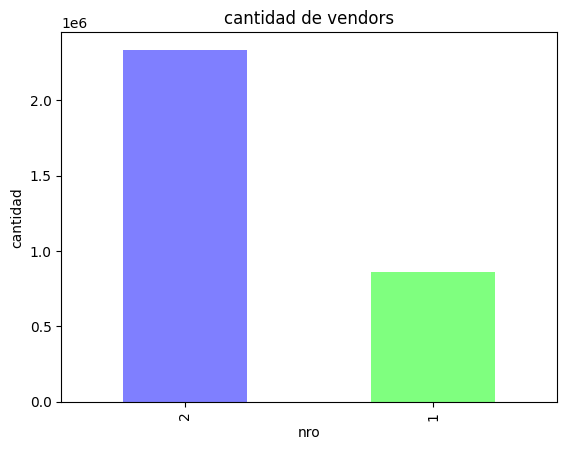

In [45]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_VendorID_Abril=taxis_amarillos_abril_limpio['VendorID'].value_counts().plot.bar(alpha=0.5,color=colores,title="cantidad de vendors", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

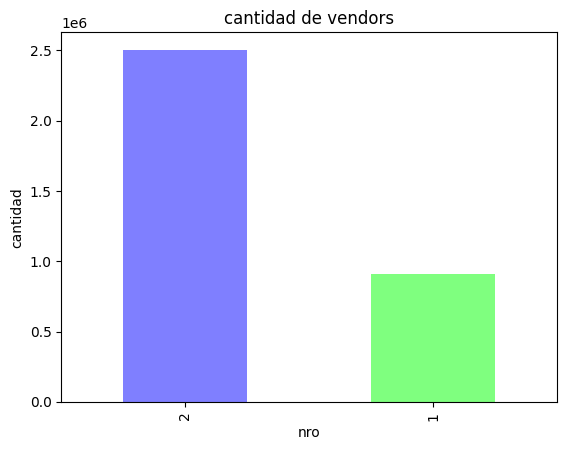

In [46]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_VendorID_Mayo=taxis_amarillos_mayo_limpio['VendorID'].value_counts().plot.bar(alpha=0.5,color=colores,title="cantidad de vendors", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

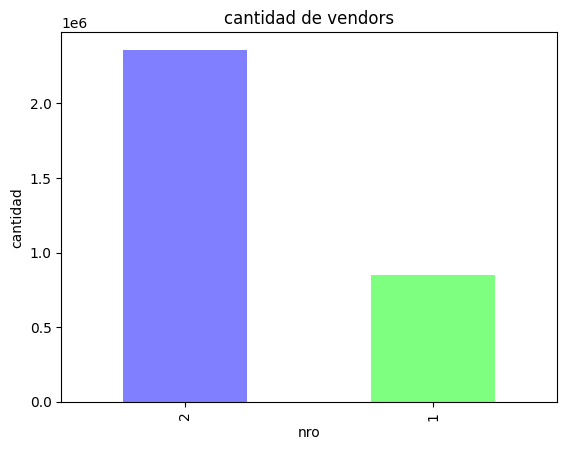

In [47]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_VendorID_Junio=taxis_amarillos_junio_limpio['VendorID'].value_counts().plot.bar(alpha=0.5,color=colores,title="cantidad de vendors", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

#Passenger_count

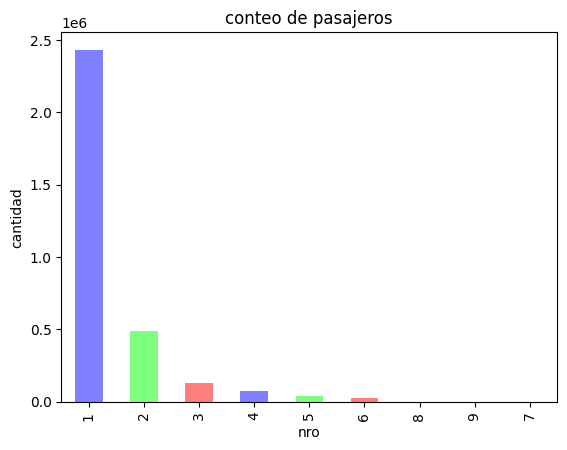

In [48]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_Passenger_count_Abril=taxis_amarillos_abril_limpio['passenger_count'].value_counts().plot.bar(alpha=0.5,color=colores,title="conteo de pasajeros", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

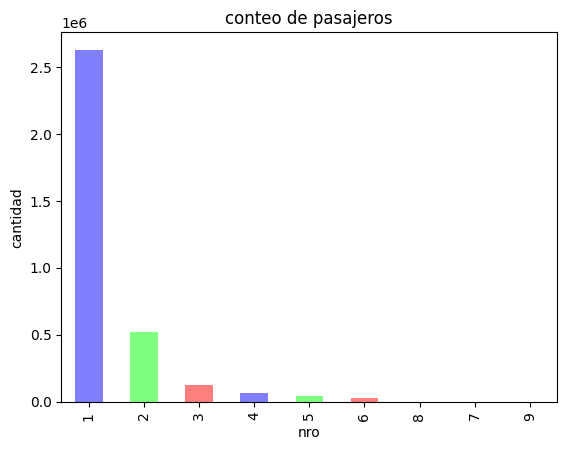

In [49]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_Passenger_count_Mayo=taxis_amarillos_mayo_limpio['passenger_count'].value_counts().plot.bar(alpha=0.5,color=colores,title="conteo de pasajeros", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

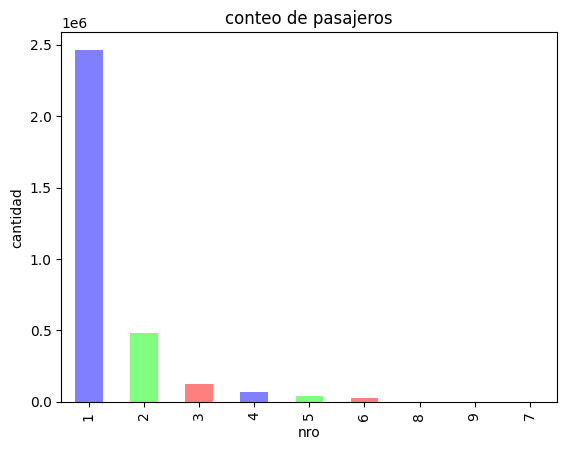

In [50]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
Grafico_Passenger_count_Junio=taxis_amarillos_junio_limpio['passenger_count'].value_counts().plot.bar(alpha=0.5,color=colores,title="conteo de pasajeros", xlabel="nro", ylabel="cantidad")
#Grafico_VendorID_Abril.plot(kind='bar')

#trip_distance

<ipython-input-51-defdc3544d0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_abril_limpio['trip_distance']=taxis_amarillos_abril_limpio['trip_distance'].astype('int8')


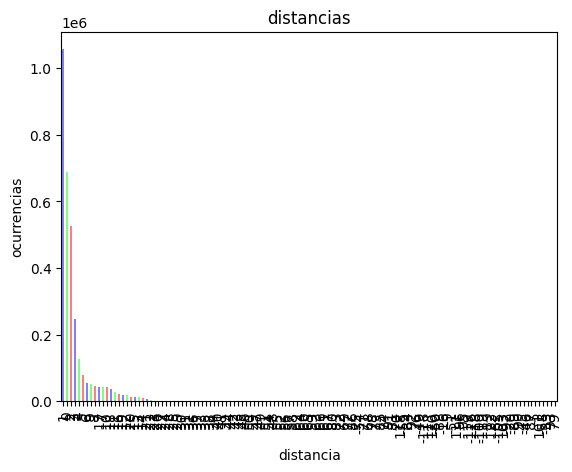

In [51]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
#taxis_amarillos_abril_limpio['trip_distance'].astype(int8, copy=False, errors='raise')
taxis_amarillos_abril_limpio['trip_distance']=taxis_amarillos_abril_limpio['trip_distance'].astype('int8')
Grafico_trip_distance_Abril=taxis_amarillos_abril_limpio['trip_distance'].value_counts().plot.bar(alpha=0.5,color=colores,title="distancias", xlabel="distancia", ylabel="ocurrencias")

<ipython-input-52-59404d82bbb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis_amarillos_mayo_limpio['trip_distance']=taxis_amarillos_mayo_limpio['trip_distance'].astype('int8')


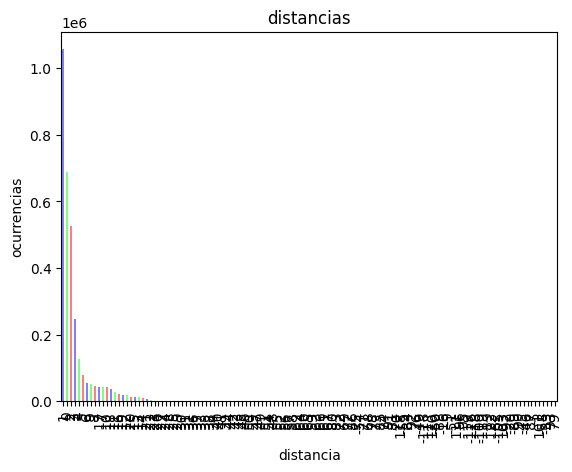

In [52]:
colores=[(0,0,1),(0,1,0),(1,0,0)]
#taxis_amarillos_abril_limpio['trip_distance'].astype(int8, copy=False, errors='raise')
taxis_amarillos_mayo_limpio['trip_distance']=taxis_amarillos_mayo_limpio['trip_distance'].astype('int8')
Grafico_trip_distance_Mayo=taxis_amarillos_abril_limpio['trip_distance'].value_counts().plot.bar(alpha=0.5,color=colores,title="distancias", xlabel="distancia", ylabel="ocurrencias")

#Veo matriz de correlacion

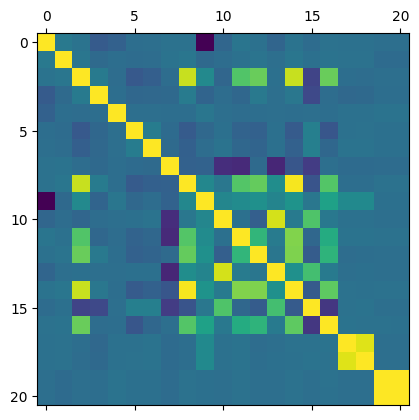

In [53]:
correlation_abril = taxis_amarillos_abril_limpio.corr(method="pearson")
import matplotlib.pyplot as plt # Make sure matplotlib is imported
plt.matshow(correlation_abril)
plt.show() # Use plt.show() to display the plot created by matshow

In [54]:
correlation_abril

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
VendorID,1.000000,0.061574,0.025624,-0.118783,-0.084359,-0.001683,0.001951,0.018980,0.024493,-0.570478,...,0.039771,0.015049,-0.055690,0.027859,-0.014868,0.021669,0.015724,0.012471,0.000442,0.000409
passenger_count,0.061574,1.000000,0.046237,-0.030008,-0.005204,-0.013333,-0.010129,0.025901,0.047810,-0.032517,...,0.014578,0.034491,0.001609,0.044585,0.007209,0.024611,0.022924,0.021800,-0.024287,-0.024191
trip_distance,0.025624,0.046237,1.000000,0.070540,-0.007865,-0.134600,-0.096655,-0.007658,0.867678,0.169646,...,0.572374,0.640628,0.011719,0.871114,-0.246093,0.642603,-0.003918,-0.010718,0.004004,0.003621
RatecodeID,-0.118783,-0.030008,0.070540,1.000000,-0.005393,-0.044558,-0.036879,-0.030809,0.084166,-0.066012,...,-0.045558,0.067256,0.004601,0.055187,-0.222812,-0.007404,-0.038364,-0.032220,-0.003517,-0.003498
store_and_fwd_flag,-0.084359,-0.005204,-0.007865,-0.005393,1.000000,0.001538,0.002372,-0.001107,-0.003328,0.044561,...,-0.007287,-0.005783,0.005626,-0.004696,0.002832,-0.004239,0.014366,0.013165,0.028268,0.028316
PULocationID,-0.001683,-0.013333,-0.134600,-0.044558,0.001538,1.000000,0.091147,-0.022411,-0.117473,-0.038148,...,-0.068588,-0.085437,0.007573,-0.116622,0.110227,-0.148588,0.013628,0.019588,0.006264,0.006247
DOLocationID,0.001951,-0.010129,-0.096655,-0.036879,0.002372,0.091147,1.000000,-0.025786,-0.088184,-0.007481,...,-0.046169,-0.064813,0.007222,-0.083241,0.107452,-0.047478,0.027149,0.029168,0.006990,0.006949
payment_type,0.018980,0.025901,-0.007658,-0.030809,-0.001107,-0.022411,-0.025786,1.000000,-0.080736,-0.079188,...,-0.382814,-0.030563,-0.398804,-0.152872,-0.289123,0.001865,-0.019702,-0.018635,-0.012701,-0.012803
fare_amount,0.024493,0.047810,0.867678,0.084166,-0.003328,-0.117473,-0.088184,-0.080736,1.000000,0.158786,...,0.580041,0.626028,0.198098,0.980294,-0.165583,0.582070,-0.000539,-0.002444,0.020430,0.020169
extra,-0.570478,-0.032517,0.169646,-0.066012,0.044561,-0.038148,-0.007481,-0.079188,0.158786,1.000000,...,0.185688,0.219145,0.139395,0.237942,0.053671,0.327389,0.177391,0.173082,0.012148,0.012008


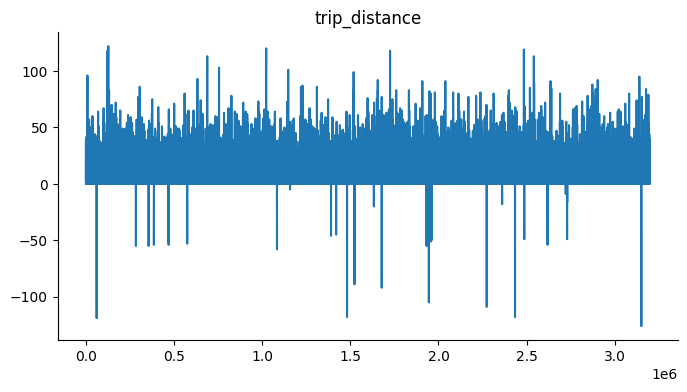

In [55]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' is your DataFrame
_df_10 = taxis_amarillos_abril_limpio  # Assign your DataFrame to _df_10

_df_10['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

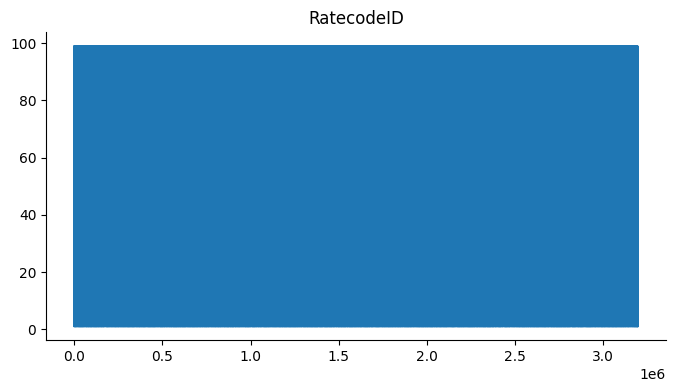

In [56]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' is your DataFrame
_df_11 = taxis_amarillos_abril_limpio  # Assign your DataFrame to _df_11

_df_11['RatecodeID'].plot(kind='line', figsize=(8, 4), title='RatecodeID')
plt.gca().spines[['top', 'right']].set_visible(False)

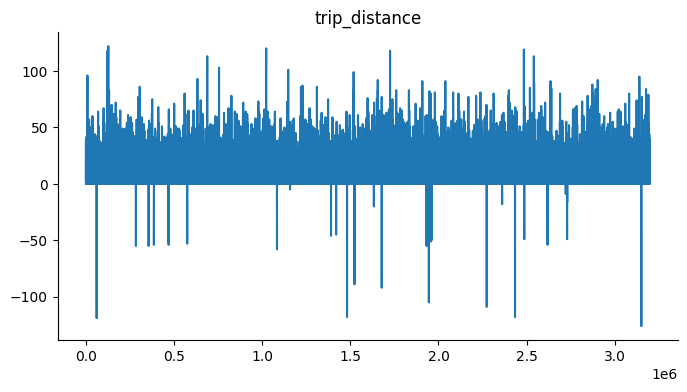

In [57]:
from matplotlib import pyplot as plt
_df_10['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

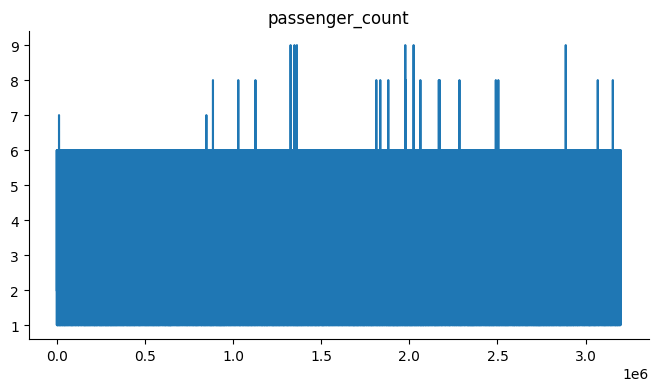

In [58]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' is your intended DataFrame
_df_9 = taxis_amarillos_abril_limpio  # Assign the DataFrame to _df_9

_df_9['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

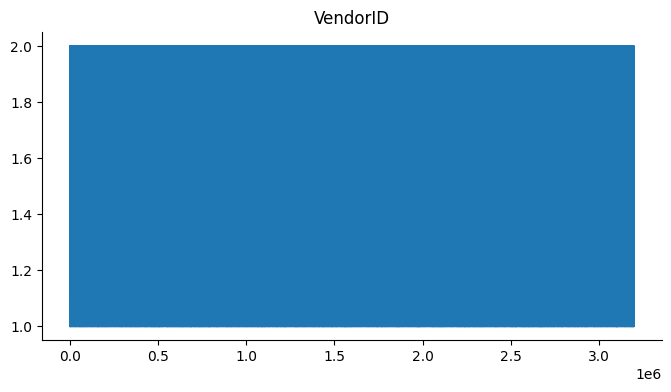

In [59]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' contains the data for _df_8
_df_8 = taxis_amarillos_abril_limpio  # Assign the DataFrame to _df_8

_df_8['VendorID'].plot(kind='line', figsize=(8, 4), title='VendorID')
plt.gca().spines[['top', 'right']].set_visible(False)

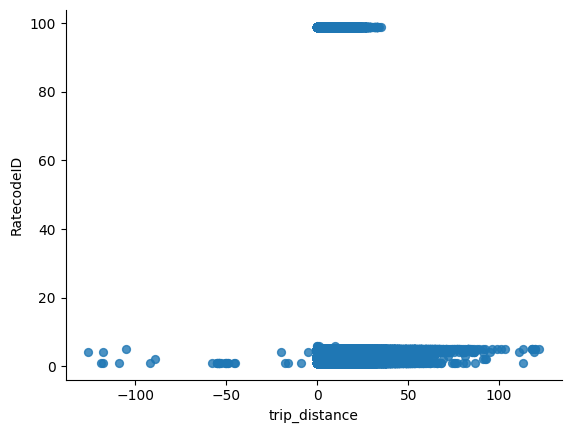

In [60]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' contains the data you want to plot
_df_6 = taxis_amarillos_abril_limpio  # Assign your DataFrame to _df_6

# Now you can proceed with plotting
_df_6.plot(kind='scatter', x='trip_distance', y='RatecodeID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

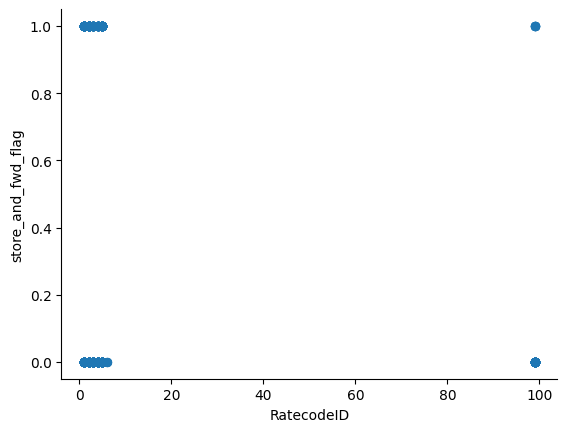

In [61]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' contains the data you want to plot
_df_7 = taxis_amarillos_abril_limpio  # Assign your DataFrame to _df_7

# Now you can proceed with plotting
_df_7.plot(kind='scatter', x='RatecodeID', y='store_and_fwd_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

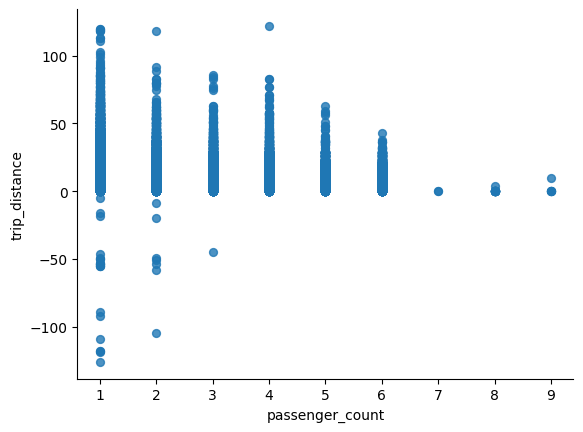

In [62]:
from matplotlib import pyplot as plt

# Assuming 'taxis_amarillos_abril_limpio' is your DataFrame
_df_5 = taxis_amarillos_abril_limpio  # Assign the DataFrame to _df_5

_df_5.plot(kind='scatter', x='passenger_count', y='trip_distance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

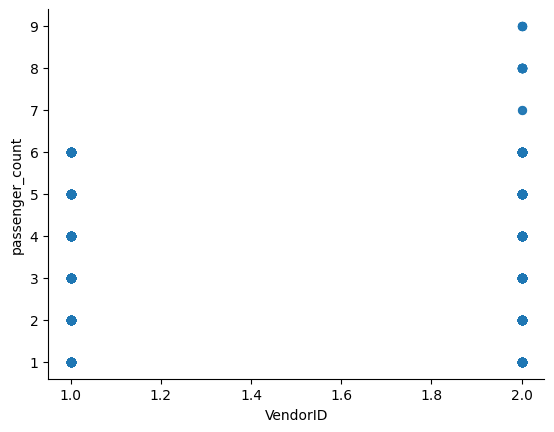

In [63]:
_df_4 = taxis_amarillos_abril_limpio  # Assign the DataFrame to _df_5
_df_4.plot(kind='scatter', x='VendorID', y='passenger_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

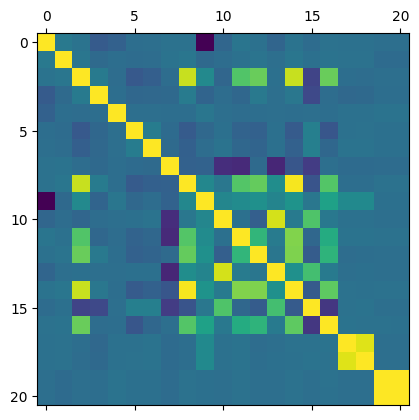

In [64]:
import matplotlib.pyplot as plt # Make sure matplotlib is imported
correlation_mayo = taxis_amarillos_mayo_limpio.corr(method="pearson")
plt.matshow(correlation_abril)
plt.show() # Use plt.show() to display the plot created by matshow

In [65]:
correlation_mayo

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
VendorID,1.000000,0.068334,0.025552,-0.118645,-0.117289,-0.002948,0.001235,0.017049,0.024292,-0.552569,...,0.039894,0.013028,-0.056354,0.028013,-0.014954,0.024061,0.021891,0.018119,0.003942,0.003968
passenger_count,0.068334,1.000000,0.032873,-0.029232,-0.008070,-0.013587,-0.010436,0.018212,0.035444,-0.036574,...,0.008613,0.025095,0.003516,0.032709,0.010479,0.014220,0.020793,0.019772,0.023905,0.023949
trip_distance,0.025552,0.032873,1.000000,0.071791,-0.007890,-0.136496,-0.104626,-0.010007,0.854575,0.176963,...,0.568892,0.640639,0.012436,0.860286,-0.245035,0.609543,-0.008168,-0.010935,0.012002,0.012139
RatecodeID,-0.118645,-0.029232,0.071791,1.000000,-0.005272,-0.044333,-0.035727,-0.029776,0.082104,-0.066406,...,-0.045244,0.069576,0.004028,0.053835,-0.220374,-0.008180,-0.040358,-0.033290,-0.003545,-0.003572
store_and_fwd_flag,-0.117289,-0.008070,-0.007890,-0.005272,1.000000,0.001389,0.002888,0.004891,-0.004275,0.064307,...,-0.010149,-0.004967,0.005934,-0.005722,0.003724,-0.005133,-0.002567,-0.001394,-0.014439,-0.014454
PULocationID,-0.002948,-0.013587,-0.136496,-0.044333,0.001389,1.000000,0.092657,-0.024228,-0.116170,-0.040723,...,-0.068206,-0.085480,0.007364,-0.115774,0.111320,-0.147459,0.007792,0.012615,-0.009625,-0.009671
DOLocationID,0.001235,-0.010436,-0.104626,-0.035727,0.002888,0.092657,1.000000,-0.025634,-0.092510,-0.009766,...,-0.049295,-0.071486,0.006737,-0.088102,0.110336,-0.049392,0.026952,0.029339,-0.008923,-0.008994
payment_type,0.017049,0.018212,-0.010007,-0.029776,0.004891,-0.024228,-0.025634,1.000000,-0.084020,-0.082674,...,-0.378193,-0.031606,-0.405271,-0.155296,-0.293761,-0.002315,-0.020881,-0.019270,0.012809,0.012797
fare_amount,0.024292,0.035444,0.854575,0.082104,-0.004275,-0.116170,-0.092510,-0.084020,1.000000,0.170310,...,0.577485,0.621140,0.198298,0.979898,-0.163257,0.547026,-0.005619,-0.002869,0.004406,0.004506
extra,-0.552569,-0.036574,0.176963,-0.066406,0.064307,-0.040723,-0.009766,-0.082674,0.170310,1.000000,...,0.198575,0.231736,0.141757,0.252211,0.051971,0.356723,0.183748,0.180263,-0.018628,-0.018594


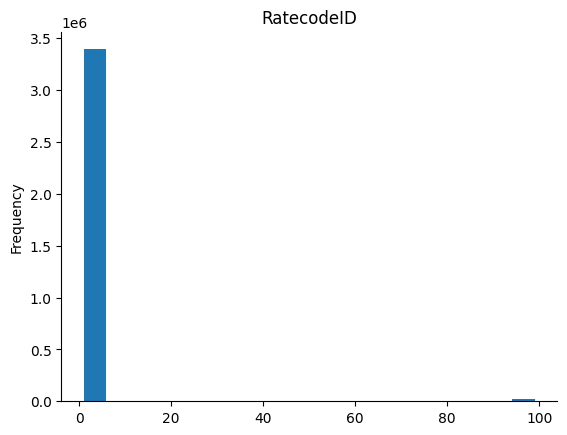

In [66]:
_df_15 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_15['RatecodeID'].plot(kind='hist', bins=20, title='RatecodeID')
plt.gca().spines[['top', 'right',]].set_visible(False)

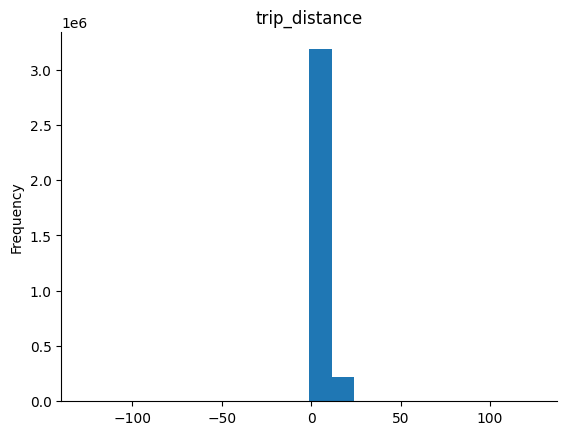

In [67]:
_df_14 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_14['trip_distance'].plot(kind='hist', bins=20, title='trip_distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

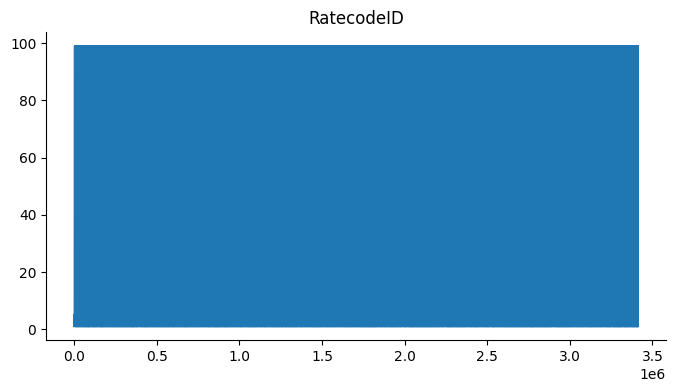

In [68]:
_df_23 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_23['RatecodeID'].plot(kind='line', figsize=(8, 4), title='RatecodeID')
plt.gca().spines[['top', 'right']].set_visible(False)

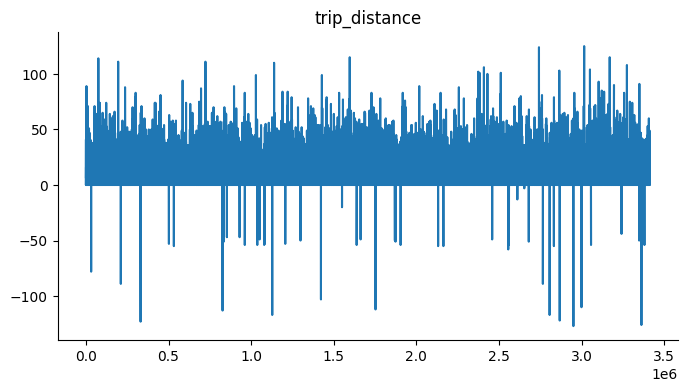

In [69]:
_df_22 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_22['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

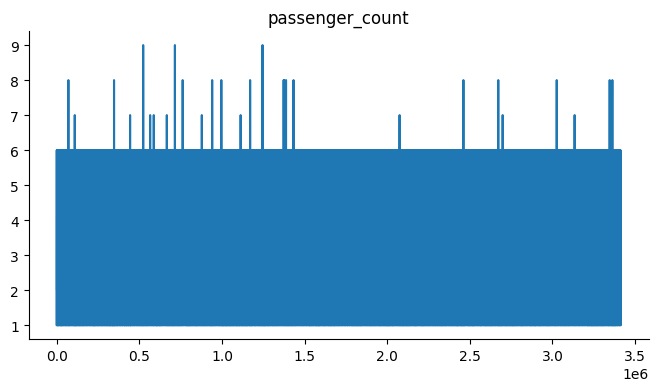

In [70]:
_df_21 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_21['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

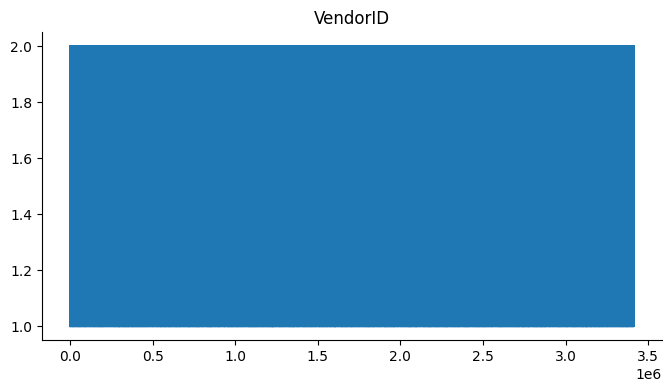

In [71]:
_df_20 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_20['VendorID'].plot(kind='line', figsize=(8, 4), title='VendorID')
plt.gca().spines[['top', 'right']].set_visible(False)

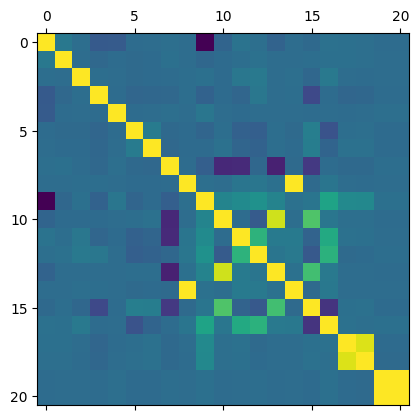

In [72]:
import matplotlib.pyplot as plt # Make sure matplotlib is imported
correlation_junio = taxis_amarillos_junio_limpio.corr(method="pearson")
plt.matshow(correlation_junio)
plt.show() # Use plt.show() to display the plot created by matshow

In [73]:
correlation_junio

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour_range,dropoff_hour_range,pickup_date_range,dropoff_date_range
VendorID,1.000000,0.068399,0.005321,-0.113726,-0.104289,-0.003074,0.000916,0.013009,0.001368,-0.552821,...,0.041361,0.014465,-0.058807,0.002373,-0.019253,0.026485,0.018942,0.015119,-0.006043,-0.006099
passenger_count,0.068399,1.000000,0.003630,-0.027733,-0.006023,-0.014973,-0.010374,0.020035,0.004648,-0.034068,...,0.010814,0.028822,0.002119,0.005223,0.006966,0.018621,0.018102,0.017058,0.001645,0.001527
trip_distance,0.005321,0.003630,1.000000,0.008292,-0.000459,-0.015634,-0.012796,-0.001144,0.009709,0.019970,...,0.065780,0.074643,0.000052,0.011970,-0.031889,0.073244,-0.000805,-0.001543,0.001161,0.001160
RatecodeID,-0.113726,-0.027733,0.008292,1.000000,-0.003859,-0.042066,-0.033158,-0.028363,0.007272,-0.064145,...,-0.039632,0.064525,0.004149,0.006027,-0.209700,-0.006181,-0.040128,-0.033230,-0.002011,-0.002004
store_and_fwd_flag,-0.104289,-0.006023,-0.000459,-0.003859,1.000000,-0.001337,0.002054,0.011664,0.000033,0.058862,...,-0.010461,0.000368,0.004517,-0.000164,-0.002489,0.001261,-0.001385,-0.000555,0.012878,0.012923
PULocationID,-0.003074,-0.014973,-0.015634,-0.042066,-0.001337,1.000000,0.090811,-0.022217,-0.011133,-0.047273,...,-0.069085,-0.082422,0.006129,-0.013718,0.108571,-0.153760,0.008228,0.013732,-0.012040,-0.011992
DOLocationID,0.000916,-0.010374,-0.012796,-0.033158,0.002054,0.090811,1.000000,-0.025755,-0.008844,-0.011663,...,-0.047305,-0.065362,0.006651,-0.010325,0.105788,-0.051814,0.026086,0.028879,-0.007809,-0.007791
payment_type,0.013009,0.020035,-0.001144,-0.028363,0.011664,-0.022217,-0.025755,1.000000,-0.006871,-0.081371,...,-0.370331,-0.032484,-0.408784,-0.016602,-0.293538,-0.004079,-0.021751,-0.019896,0.009596,0.009439
fare_amount,0.001368,0.004648,0.009709,0.007272,0.000033,-0.011133,-0.008844,-0.006871,1.000000,0.015637,...,0.051808,0.055090,0.018499,0.999554,-0.015921,0.051887,-0.000565,-0.000890,0.000760,0.000766
extra,-0.552821,-0.034068,0.019970,-0.064145,0.058862,-0.047273,-0.011663,-0.081371,0.015637,1.000000,...,0.191091,0.231814,0.144224,0.028367,0.047794,0.347311,0.178173,0.174987,0.017677,0.017744


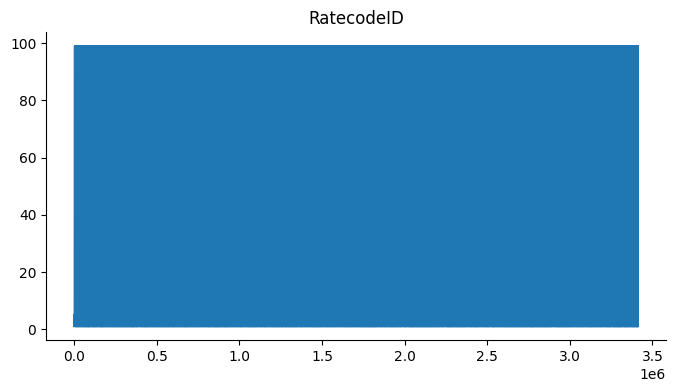

In [74]:
_df_35 = taxis_amarillos_mayo_limpio  # Assign your DataFrame to _df_15
_df_35['RatecodeID'].plot(kind='line', figsize=(8, 4), title='RatecodeID')
plt.gca().spines[['top', 'right']].set_visible(False)

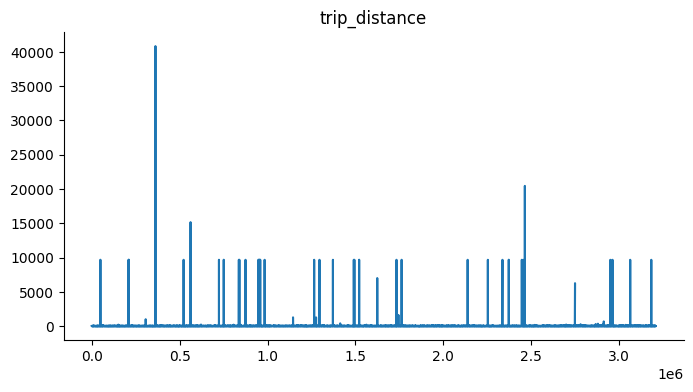

In [75]:
from matplotlib import pyplot as plt
taxis_amarillos_junio_limpio['trip_distance'].plot(kind='line', figsize=(8, 4), title='trip_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

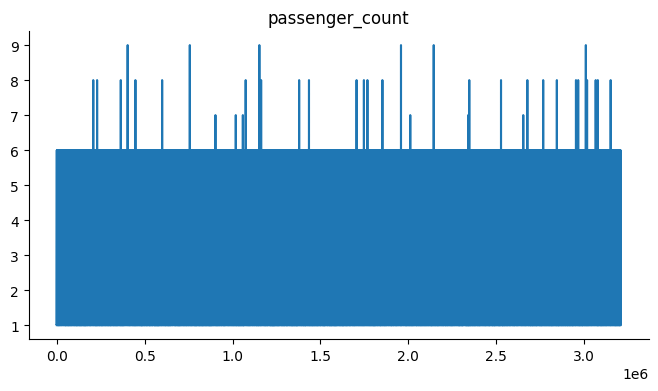

In [76]:
from matplotlib import pyplot as plt
taxis_amarillos_junio_limpio['passenger_count'].plot(kind='line', figsize=(8, 4), title='passenger_count')
plt.gca().spines[['top', 'right']].set_visible(False)

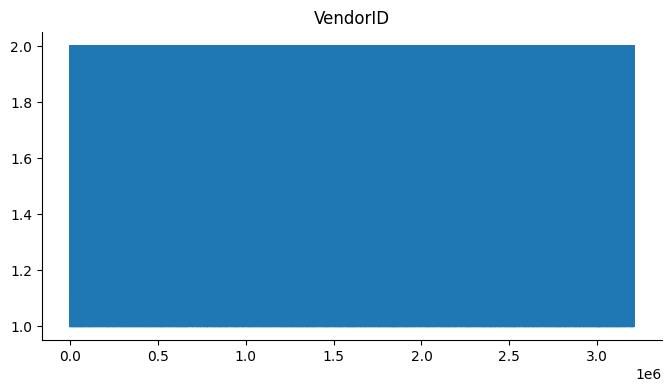

In [77]:
from matplotlib import pyplot as plt
taxis_amarillos_junio_limpio['VendorID'].plot(kind='line', figsize=(8, 4), title='VendorID')
plt.gca().spines[['top', 'right']].set_visible(False)

# Grafico de violin

## trip_distance vs fare_amount

<ipython-input-78-04787728dc40>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_1=sns.violinplot(x="trip_distance", y="fare_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs fare_amount")
<ipython-input-78-04787728dc40>:1: UserWarning: 
The palette list has fewer values (2) than needed (125) and will cycle, which may produce an uninterpretable plot.
  grafico_1=sns.violinplot(x="trip_distance", y="fare_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs fare_amount")


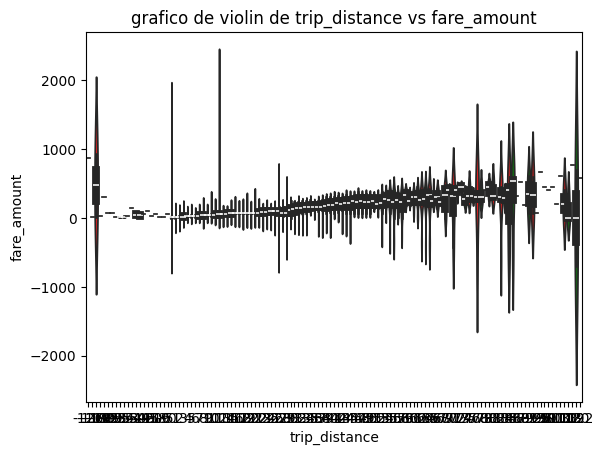

In [78]:
grafico_1=sns.violinplot(x="trip_distance", y="fare_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs fare_amount")

## trip_distance vs  total_amount

<ipython-input-79-a1677c51a601>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_2=sns.violinplot(x="trip_distance", y="total_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs total_amount")
<ipython-input-79-a1677c51a601>:1: UserWarning: 
The palette list has fewer values (2) than needed (125) and will cycle, which may produce an uninterpretable plot.
  grafico_2=sns.violinplot(x="trip_distance", y="total_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs total_amount")


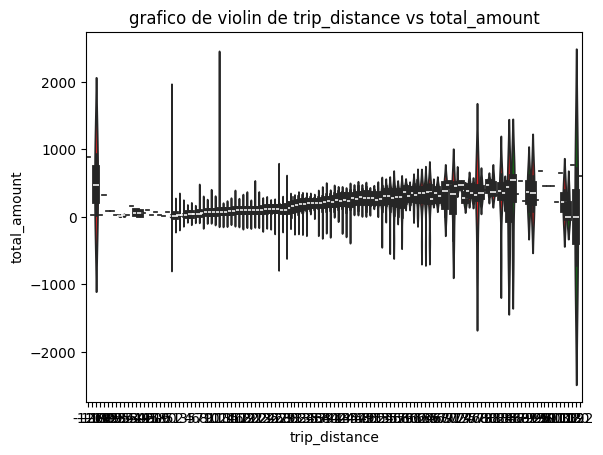

In [79]:
grafico_2=sns.violinplot(x="trip_distance", y="total_amount", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de trip_distance vs total_amount")

#grafico de violin de mta_tax vs improvement_surcharge

<ipython-input-80-467ed3e82db8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_3=sns.violinplot(x="mta_tax", y="improvement_surcharge", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de mta_tax vs improvement_surcharge")
<ipython-input-80-467ed3e82db8>:1: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  grafico_3=sns.violinplot(x="mta_tax", y="improvement_surcharge", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de mta_tax vs improvement_surcharge")


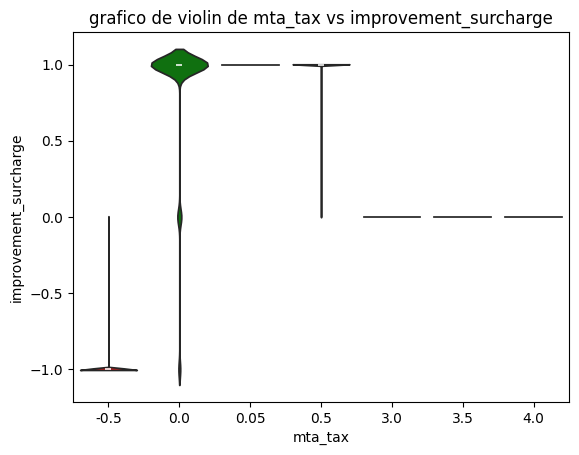

In [80]:
grafico_3=sns.violinplot(x="mta_tax", y="improvement_surcharge", data=taxis_amarillos_abril_limpio, palette=["r","g"]).set(title="grafico de violin de mta_tax vs improvement_surcharge")

#Histogramas/Distribuciones de las variables
analizo de que tipo de distribuciones es cada variable, arranco con la tabla de abril

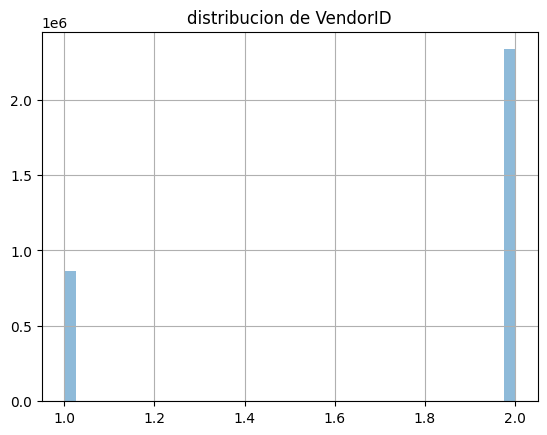

In [81]:
grafico_hist_VendorID_abril=taxis_amarillos_abril_limpio['VendorID'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de VendorID") # se establece el título usando plt.title()
plt.show()

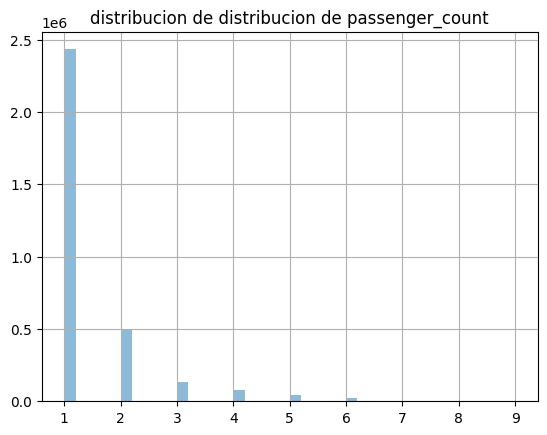

In [82]:
#grafico_hist_passenger_count_abril=taxis_amarillos_abril_limpio['passenger_count'].hist(alpha=0.5,bins=40,title="distribucion de passenger_count")
grafico_hist_passenger_count_abril=taxis_amarillos_abril_limpio['passenger_count'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de passenger_count") # se establece el título usando plt.title()
plt.show()

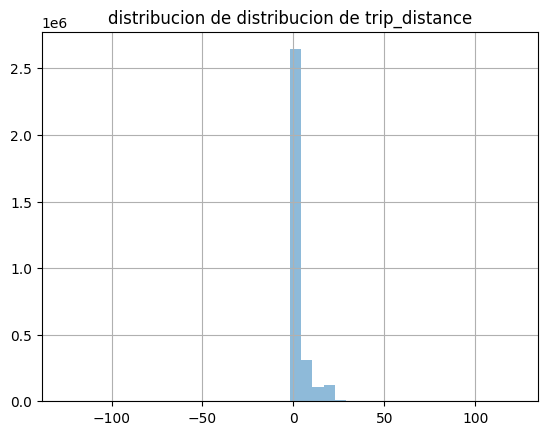

In [83]:
#grafico_hist_trip_distance_abril=taxis_amarillos_abril_limpio['trip_distance'].hist(alpha=0.5,bins=40,title="distribucion de trip_distance")
grafico_hist_trip_distance_abril=taxis_amarillos_abril_limpio['trip_distance'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de trip_distance") # se establece el título usando plt.title()
plt.show()

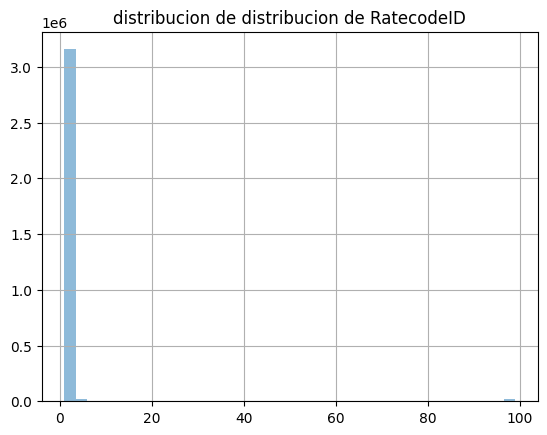

In [84]:
#grafico_hist_RatecodeID_abril=taxis_amarillos_abril_limpio['RatecodeID'].hist(alpha=0.5,bins=40,title="distribucion de RatecodeID")
grafico_hist_RatecodeID_abril=taxis_amarillos_abril_limpio['RatecodeID'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de RatecodeID") # se establece el título usando plt.title()
plt.show()

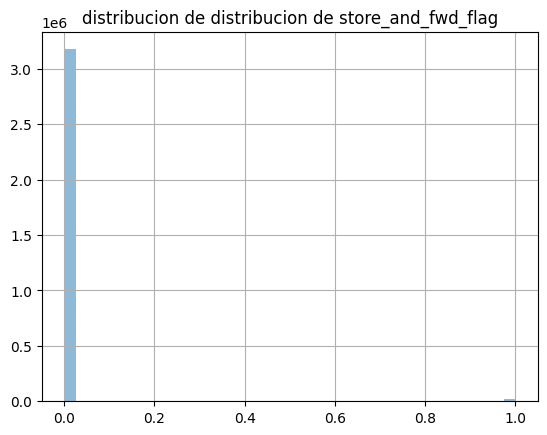

In [85]:
#grafico_hist_store_and_fwd_flag_abril=taxis_amarillos_abril_limpio['store_and_fwd_flag'].hist(alpha=0.5,bins=40,title="distribucion de store_and_fwd_flag")
grafico_hist_store_and_fwd_flag_abril=taxis_amarillos_abril_limpio['store_and_fwd_flag'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de store_and_fwd_flag") # se establece el título usando plt.title()
plt.show()

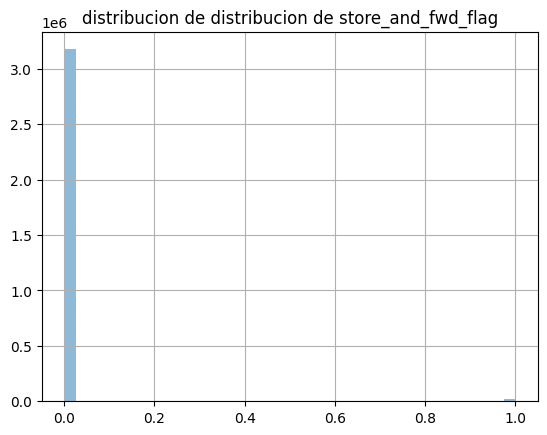

In [86]:
#grafico_hist_PULocationID_abril=taxis_amarillos_abril_limpio['PULocationID'].hist(alpha=0.5,bins=40,title="distribucion de PULocationID")
grafico_hist_store_and_fwd_flag_abril=taxis_amarillos_abril_limpio['store_and_fwd_flag'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de store_and_fwd_flag") # se establece el título usando plt.title()
plt.show()

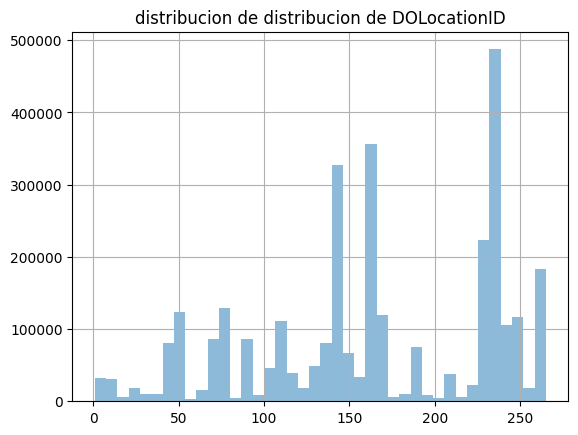

In [87]:
#grafico_hist_DOLocationID_abril=taxis_amarillos_abril_limpio['DOLocationID'].hist(alpha=0.5,bins=40,title="distribucion de DOLocationID")
grafico_hist_DOLocationID_abril=taxis_amarillos_abril_limpio['DOLocationID'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de DOLocationID") # se establece el título usando plt.title()
plt.show()

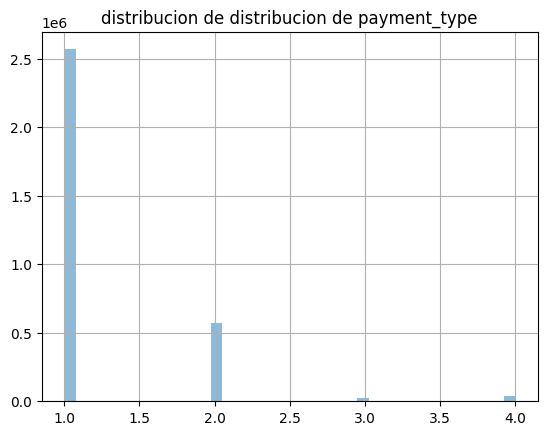

In [88]:
#grafico_hist_payment_type_abril=taxis_amarillos_abril_limpio['payment_type'].hist(alpha=0.5,bins=40,title="distribucion de payment_type")
grafico_hist_payment_type_abril=taxis_amarillos_abril_limpio['payment_type'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de payment_type") # se establece el título usando plt.title()
plt.show()

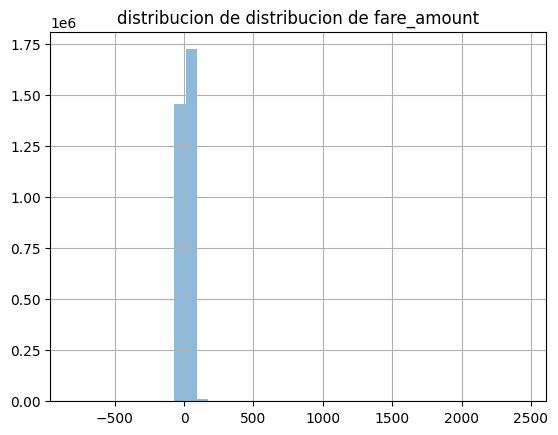

In [89]:
#grafico_hist_fare_amount_abril=taxis_amarillos_abril_limpio['fare_amount'].hist(alpha=0.5,bins=40,title="distribucion de fare_amount")
grafico_hist_fare_amount_abril=taxis_amarillos_abril_limpio['fare_amount'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de fare_amount") # se establece el título usando plt.title()
plt.show()

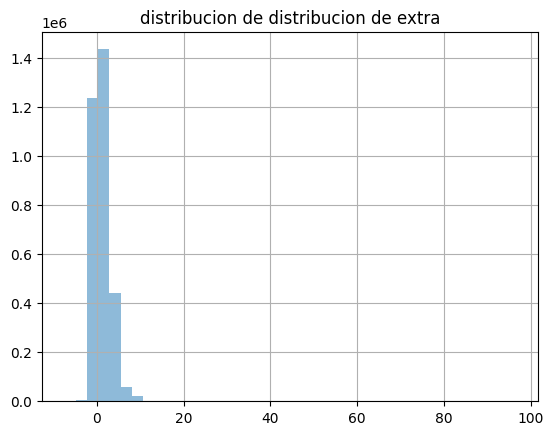

In [90]:
#grafico_hist_extra_abril=taxis_amarillos_abril_limpio['extra'].hist(alpha=0.5,bins=40,title="distribucion de extra")
grafico_hist_extra_abril=taxis_amarillos_abril_limpio['extra'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de extra") # se establece el título usando plt.title()
plt.show()

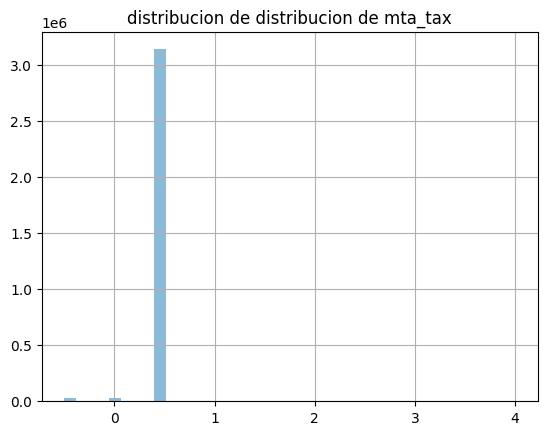

In [91]:
#grafico_hist_mta_tax_abril=taxis_amarillos_abril_limpio['mta_tax'].hist(alpha=0.5,bins=40,title="distribucion de mta_tax")
grafico_hist_mta_tax_abril=taxis_amarillos_abril_limpio['mta_tax'].hist(alpha=0.5,bins=40)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de mta_tax") # se establece el título usando plt.title()
plt.show()

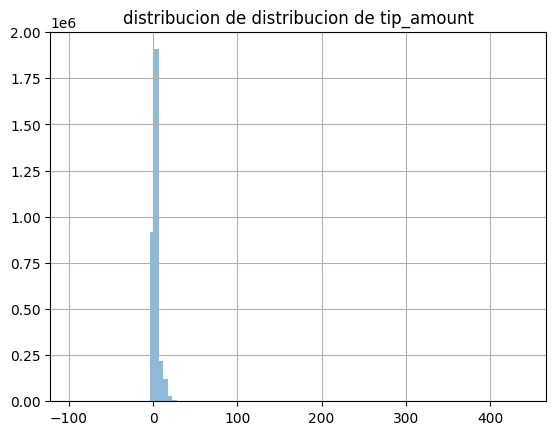

In [92]:
grafico_hist_tip_amount_abril=taxis_amarillos_abril_limpio['tip_amount'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de tip_amount") # se establece el título usando plt.title()
plt.show()

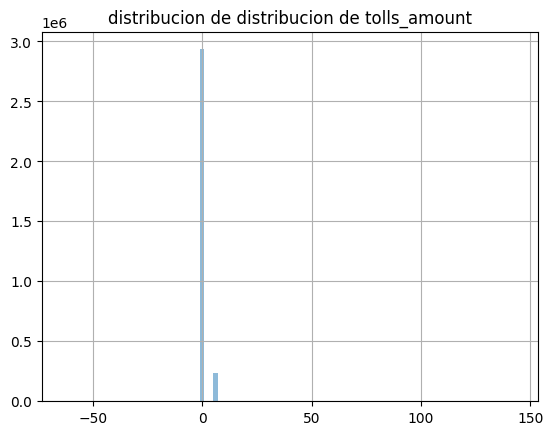

In [93]:
grafico_hist_tip_amount_abril=taxis_amarillos_abril_limpio['tolls_amount'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de tolls_amount") # se establece el título usando plt.title()
plt.show()

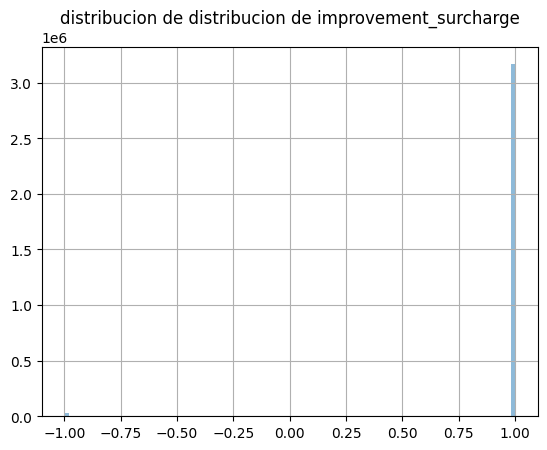

In [94]:
grafico_hist_improvement_surcharge_abril=taxis_amarillos_abril_limpio['improvement_surcharge'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de improvement_surcharge") # se establece el título usando plt.title()
plt.show()

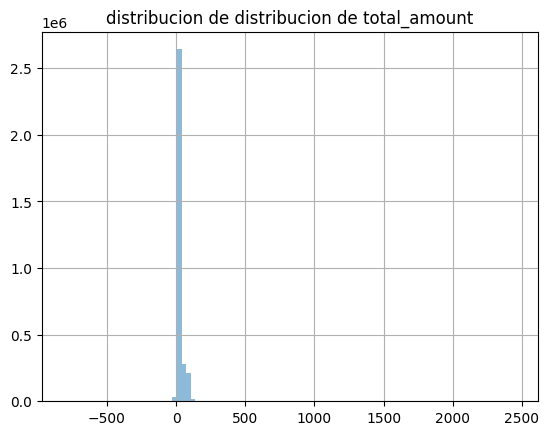

In [95]:
grafico_hist_total_amount_abril=taxis_amarillos_abril_limpio['total_amount'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de total_amount") # se establece el título usando plt.title()
plt.show()

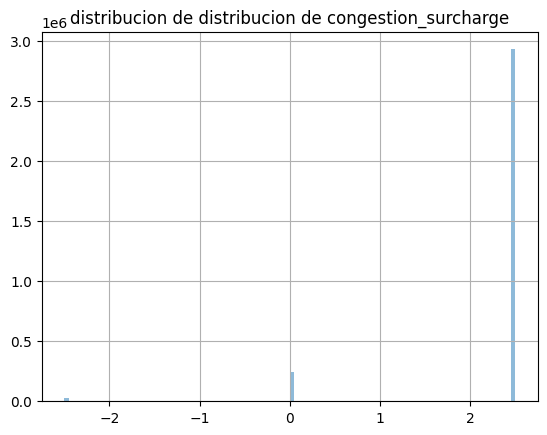

In [96]:
grafico_hist_congestion_surcharge_abril=taxis_amarillos_abril_limpio['congestion_surcharge'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de congestion_surcharge") # se establece el título usando plt.title()
plt.show()

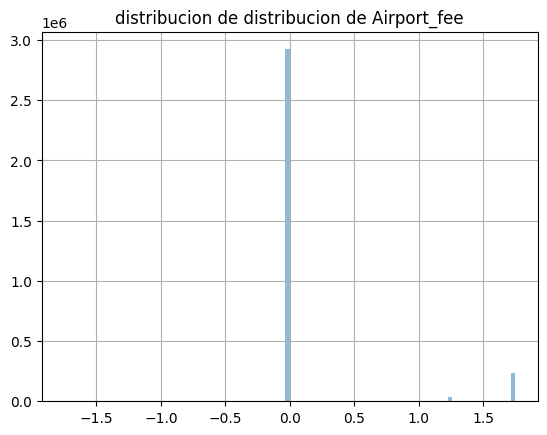

In [97]:
grafico_hist_Airport_fee_abril=taxis_amarillos_abril_limpio['Airport_fee'].hist(alpha=0.5,bins=100)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de Airport_fee") # se establece el título usando plt.title()
plt.show()

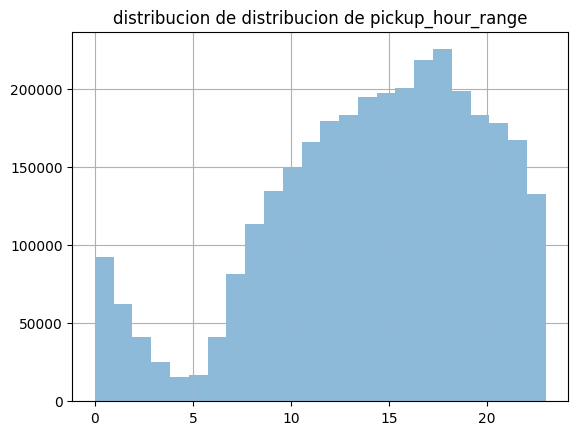

In [98]:
grafico_hist_pickup_hour_range_abril=taxis_amarillos_abril_limpio['pickup_hour_range'].hist(alpha=0.5,bins=24)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de pickup_hour_range") # se establece el título usando plt.title()
plt.show()

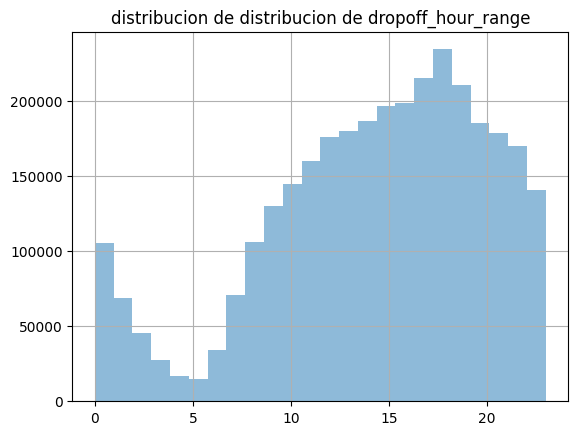

In [99]:
#dropoff_hour_range
grafico_hist_dropoff_hour_range_abril=taxis_amarillos_abril_limpio['dropoff_hour_range'].hist(alpha=0.5,bins=24)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de dropoff_hour_range") # se establece el título usando plt.title()
plt.show()

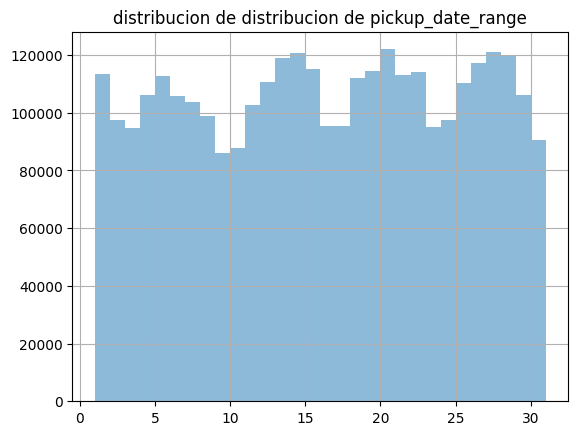

In [100]:
#pickup_date_range
grafico_hist_pickup_date_range_abril=taxis_amarillos_abril_limpio['pickup_date_range'].hist(alpha=0.5,bins=30)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de pickup_date_range") # se establece el título usando plt.title()
plt.show()

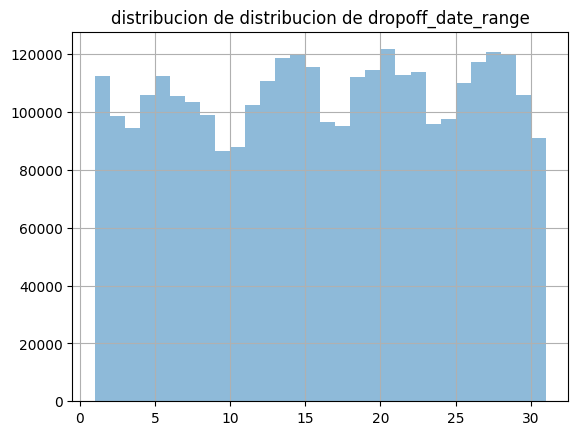

In [101]:
#dropoff_date_range
grafico_hist_dropoff_date_range_abril=taxis_amarillos_abril_limpio['dropoff_date_range'].hist(alpha=0.5,bins=30)
# se crea el histograma sin el título

plt.title("distribucion de distribucion de dropoff_date_range") # se establece el título usando plt.title()
plt.show()